In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from datasets import load_dataset

linestyles = {'sampling': 'ks-', 'search': 'bo-', 'uniform':'rx-',
              'search_search': 'g.-', 'sampling_sampling':'c--', 'sampling_search':'o--',
              'reference': 'k--'}
# methods_all = ['uniform', 'sampling', 'search', 'sampling_sampling', 'search_search', 'sampling_search', 'reference']
methods_all = ['uniform', 'sampling', 'search', 'sampling_sampling', 'search_search']
get_idx = {method:i for i, method in enumerate(methods_all)}
colors = ['#CC79A7', '#0072B2', '#D55E00', '#009E73', '#E69F00', '#56B4E9', '#000000']
markers = ['v', 'o', 's', '^',  'D', '*', '']
linestyles = [':', '-', '--', '-.',  '-', '--', ':']
names = ["-".join(method.split("_")) for method in methods_all]

plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],  # or "Computer Modern Roman"
    "axes.labelsize": 15,
    "font.size": 15,
    "legend.fontsize": 13,
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
})

## Todo: clustering, compare to ground truth clustering's energy? visualize what points are picked? 1NN classifier resulting accuracy?
* try spectral embedding and then doing clustering energy with adaptive methods
* clean up/expand README.md (make clear for Ethan)
* perhaps start low-rank implementations
* work on getting paper edited with Rob, while Ethan is out til later. 

In [2]:
def is_mono(l):
    # assuming l is numpy array
    return (np.diff(l) <= 1e-8).all()

def plot_energies(filename, to_plot, datasetname, save=False, k=None, k_os=50):
    with open(filename, "rb") as f:
        data = pickle.load(f)
    datasetname = filename.split("_")[0].split("/")[-1]
    n = load_dataset(datasetname)[0].shape[1]
    
    p = filename.split("_p")[-1].split("_")[0]
    if p == "inf":
        p = r"\infty"
    else:
        p = int(p)
    
    if p == r"\infty":
        divisor = 1.0
    else:
        divisor = n**(1.0/float(p))
    
    if k is None:
        k = int(filename.split("_k")[-1].split("_")[0])
    kref = max(k_os, k)
    fig, ax = plt.subplots(figsize=(9,6), constrained_layout=True)
    mineval = 1e10
    for method in to_plot:
        try:
            dict = data[method]
        except:
            print(f"Something wrong with {method}...")
            continue 

        if len(method.split("_")) == 1:
            evals = np.array([x for x in dict['energy_values']]).mean(axis=0)
            if evals.size < k_os:
                evals = evals[:k] # doesn't affect oversampling methods
            else:
                evals = evals[:min(k_os, evals.size)]
            
        else:
            # if swap move method
            evals = np.array(dict['energy'])
            if len(evals) == 0:
                continue
            evals = evals.mean(axis=0)
            evals = evals[:k]   # only do swaps on non-oversampling methods
        print(method, evals.size)
        mineval = min(evals.min(), mineval)
        plot = ax.semilogy(np.arange(1, evals.size+1), evals/divisor, color=colors[get_idx[method]], \
                            marker=markers[get_idx[method]], linestyle=linestyles[get_idx[method]], \
                            linewidth=2.0, label=names[get_idx[method]], markersize=8)
    ax.set_xscale('log')
    ax.set_autoscale_on(False)  # Disable autoscaling entirely
    ax.vlines(x=k, color='k', linestyles=':', ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1])
    plt.tick_params(axis='x', labelsize=22)
    plt.tick_params(axis='y', labelsize=22)
    if p == 2:
        ax.legend(loc='upper right', fontsize=18)
    else:
        if p != 1:
            ax.set_xlabel(r"Size $(k)$ of Prototype Set", fontsize=22)
            if p == 5:
                ax.set_ylabel(r"Objective function, $f(\mathcal{Y})$", fontsize=22)
        else:
            ax.set_ylabel(r"Objective function, $f(\mathcal{Y})$", fontsize=22)
    ax.text(x=0.06, y=0.1, s=fr"$p = {p}$", 
        ha='left', va='bottom', transform=ax.transAxes, 
        fontsize=22)
    if save:
        plt.savefig(f"./figures/{filename.split('/')[-1].split('.pkl')[0]}.png", format="png", dpi=500, bbox_inches='tight')
    plt.show()


(94249, 162)
(7500, 162)
uniform 30
sampling 30
search 6
sampling_sampling 6
search_search 6


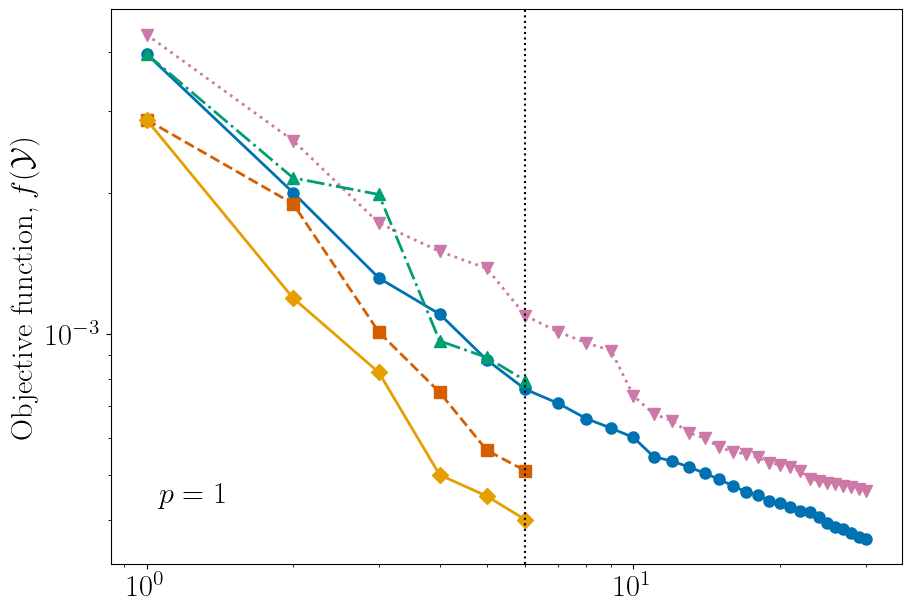

(94249, 162)
(7500, 162)
uniform 30
sampling 30
search 6
sampling_sampling 6
search_search 6


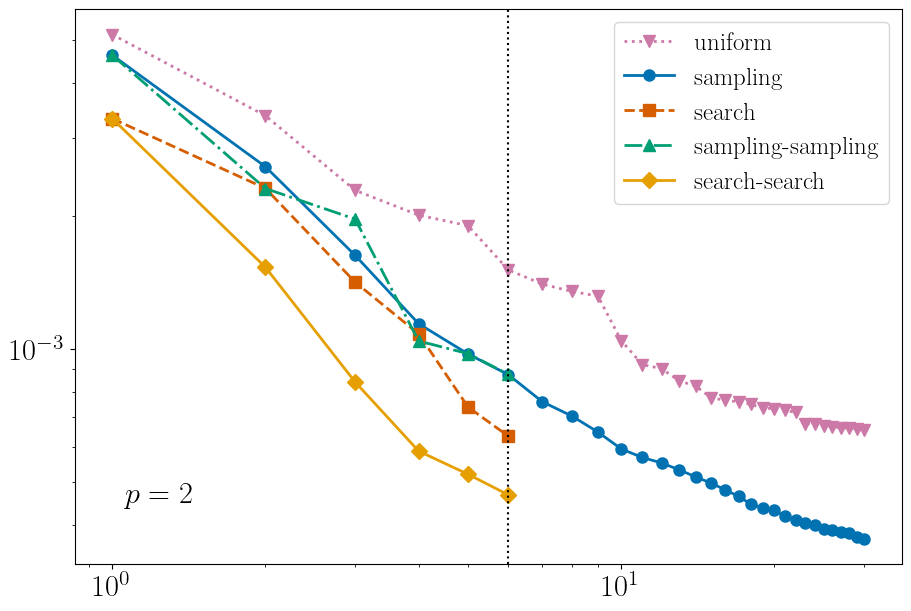

(94249, 162)
(7500, 162)
uniform 30
sampling 30
search 6
sampling_sampling 6
search_search 6


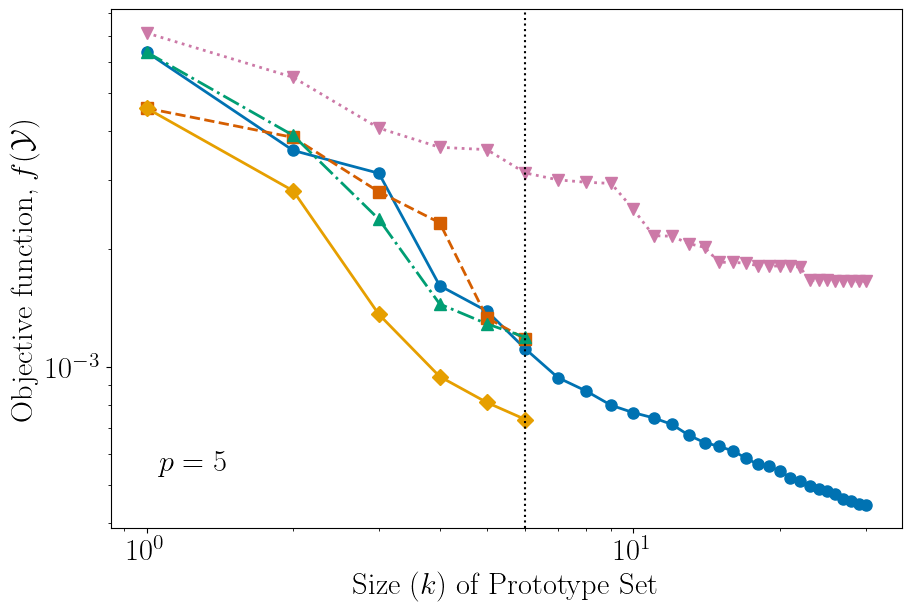

(94249, 162)
(7500, 162)
uniform 30
sampling 30
search 6
sampling_sampling 6
search_search 6


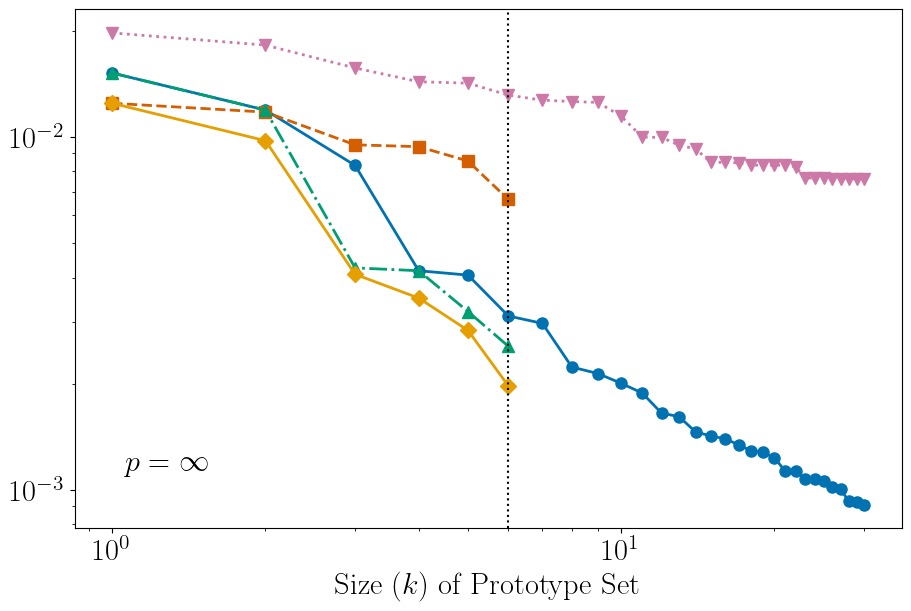

In [33]:
save = True
datasetname = "Urban"
dataset_lower = 'urbansub'
k = 6
for p in [1,2,5, 'inf']:
    filename = f"results/{dataset_lower}_conic_k{k}_p{p}_ns10.pkl"
    with open(filename, "rb") as f:
        data = pickle.load(f)
    
    plot_energies(filename, methods_all, datasetname, save=save, k=k, k_os=30)


0.0 1.0
(5348, 204)
uniform 30
sampling 30
search 6
sampling_sampling 6
search_search 6


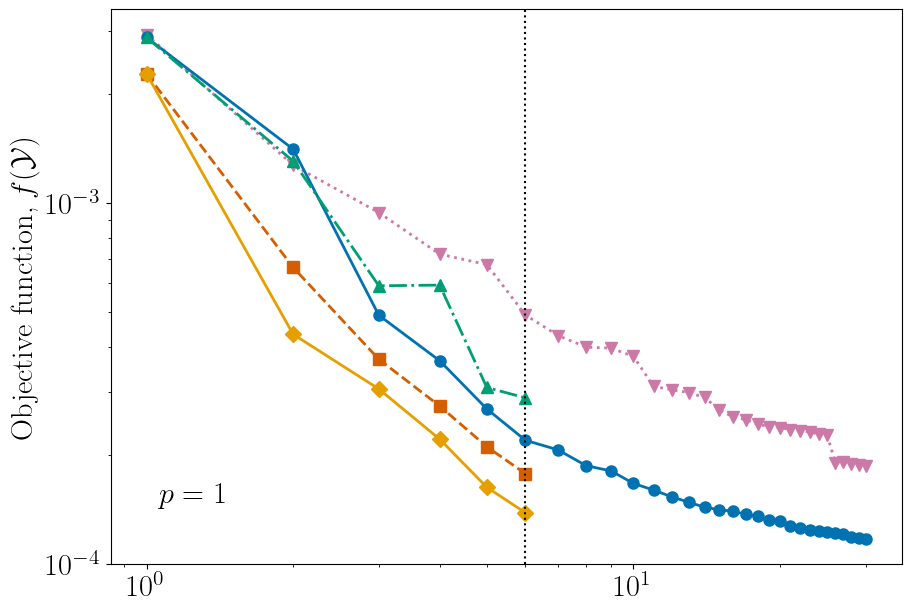

0.0 1.0
(5348, 204)
uniform 30
sampling 30
search 6
sampling_sampling 6
search_search 6


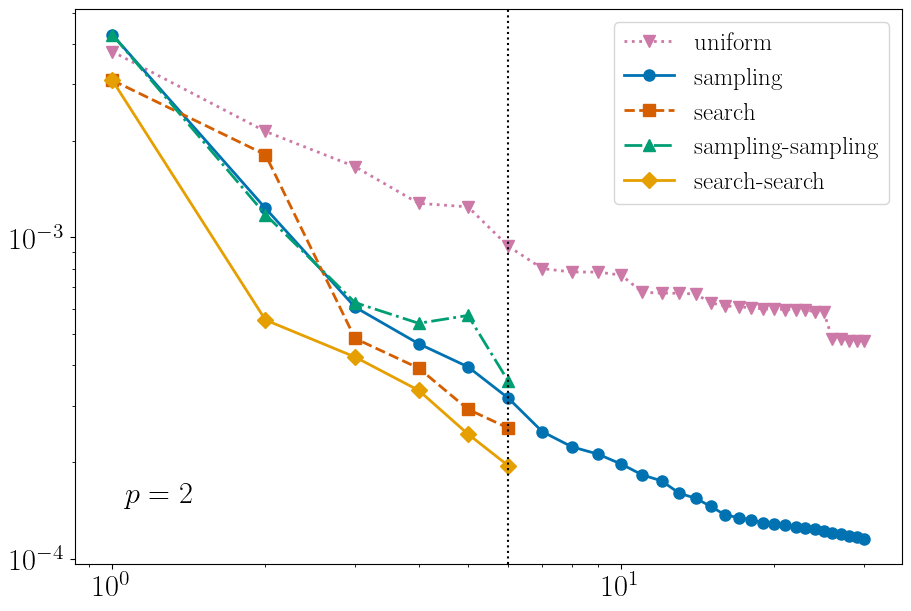

0.0 1.0
(5348, 204)
uniform 30
sampling 30
search 6
sampling_sampling 6
search_search 6


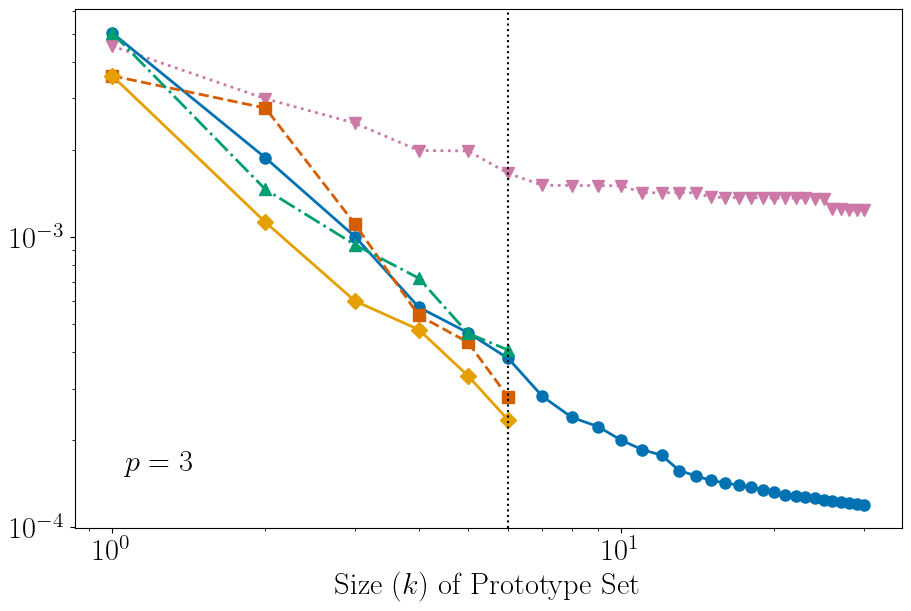

0.0 1.0
(5348, 204)
uniform 30
sampling 30
search 6
sampling_sampling 6
search_search 6


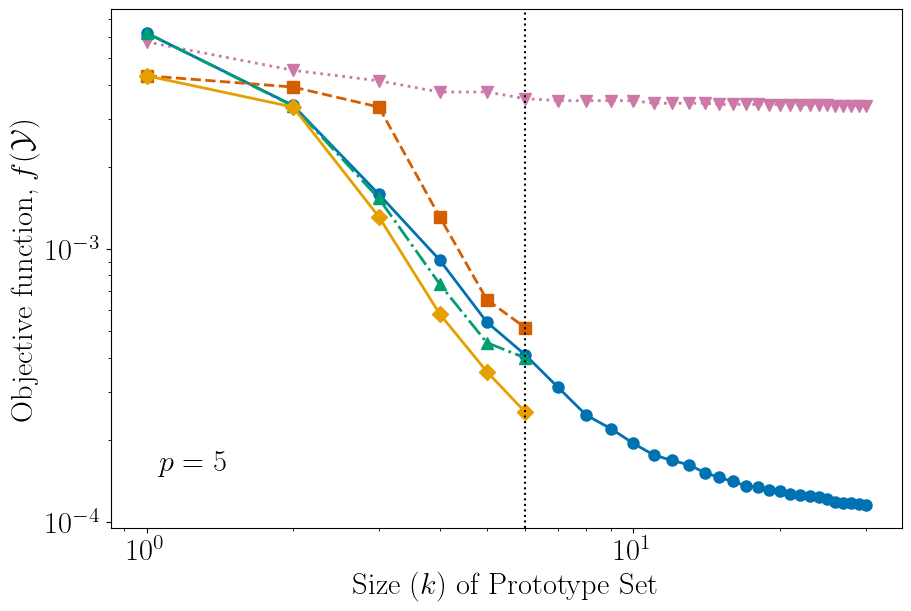

0.0 1.0
(5348, 204)
uniform 30
sampling 30
search 6
sampling_sampling 6
search_search 6


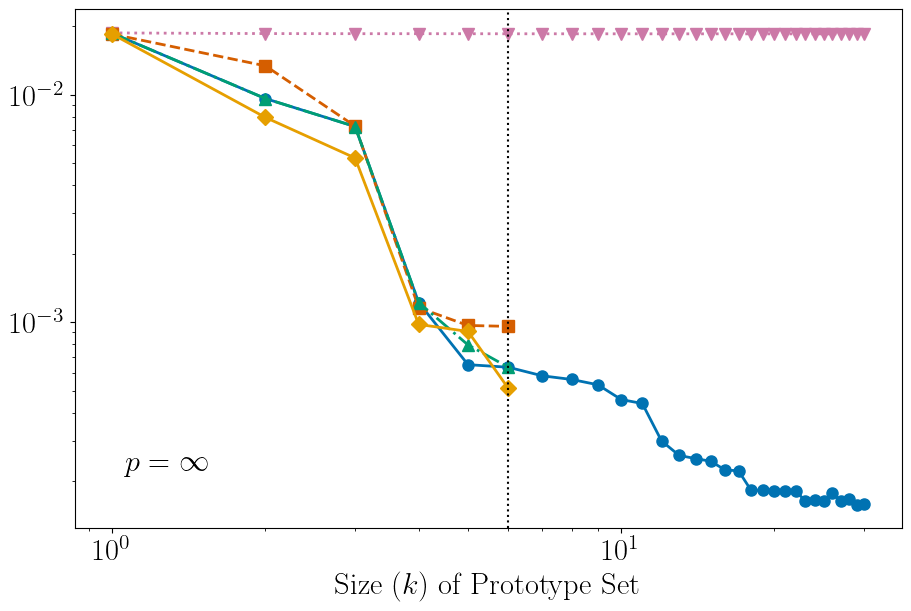

In [34]:
save = True
datasetname = "Salinas-A"
dataset_lower = 'salinas'
k = 6
for p in [1,2,3,5, 'inf']:
    filename = f"results/{dataset_lower}_conic_k{k}_p{p}_ns10.pkl"
    with open(filename, "rb") as f:
        data = pickle.load(f)

    plot_energies(filename, methods_all, datasetname, save=save, k=k, k_os=30)



(42776, 103)
(5000, 103)
uniform 45
sampling 45
search 9
sampling_sampling 9
search_search 9


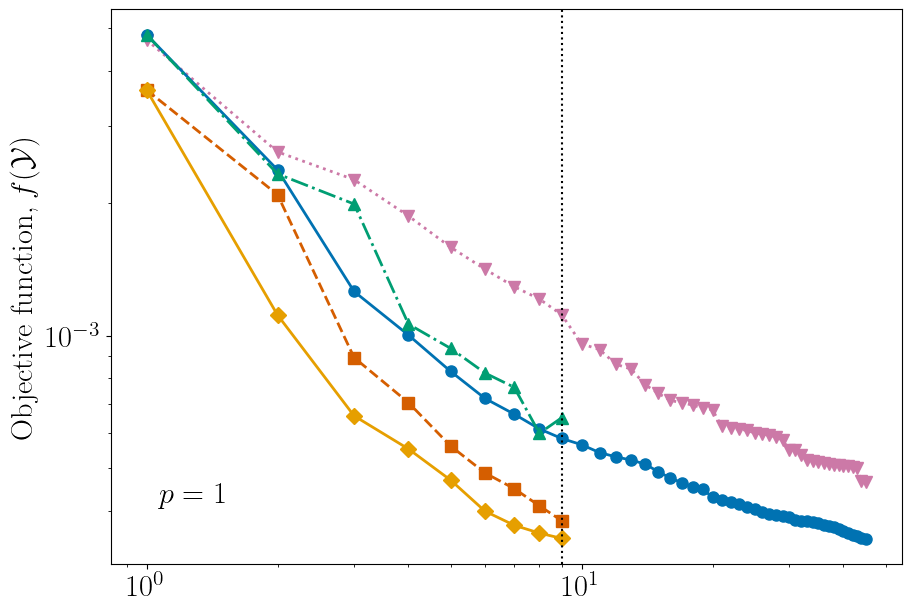

(42776, 103)
(5000, 103)
uniform 45
sampling 45
search 9
sampling_sampling 9
search_search 9


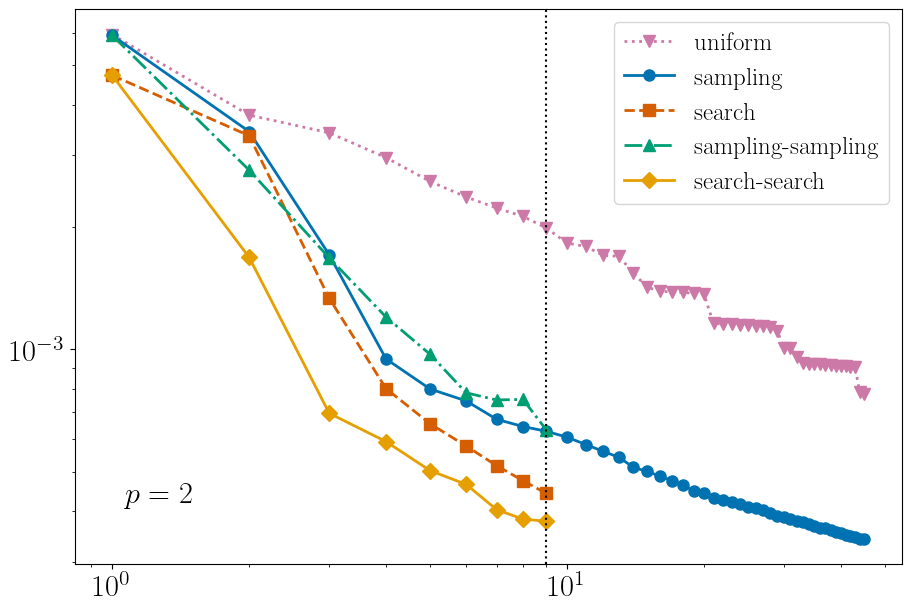

(42776, 103)
(5000, 103)
uniform 45
sampling 45
search 9
sampling_sampling 9
search_search 9


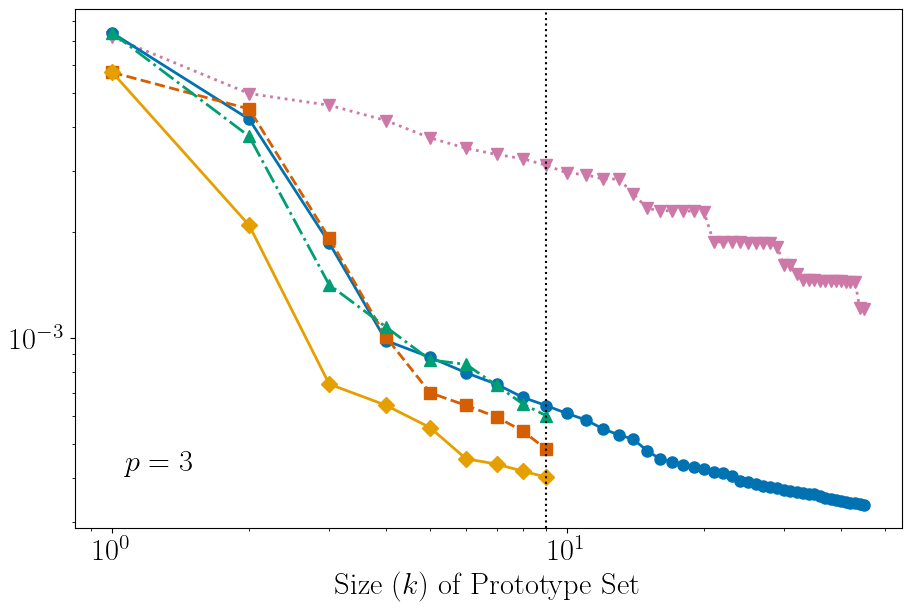

(42776, 103)
(5000, 103)
uniform 45
sampling 45
search 9
sampling_sampling 9
search_search 9


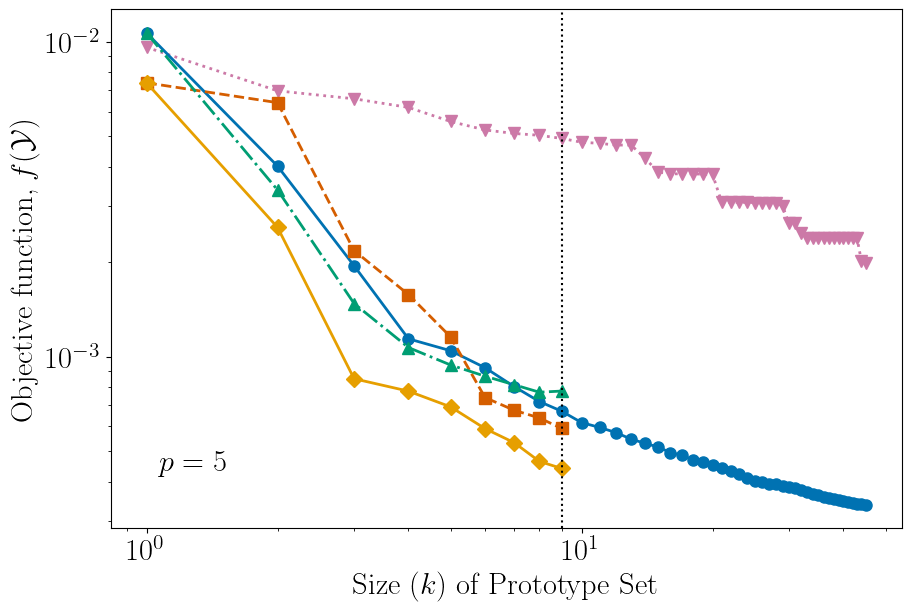

(42776, 103)
(5000, 103)
uniform 45
sampling 45
search 9
sampling_sampling 9
search_search 9


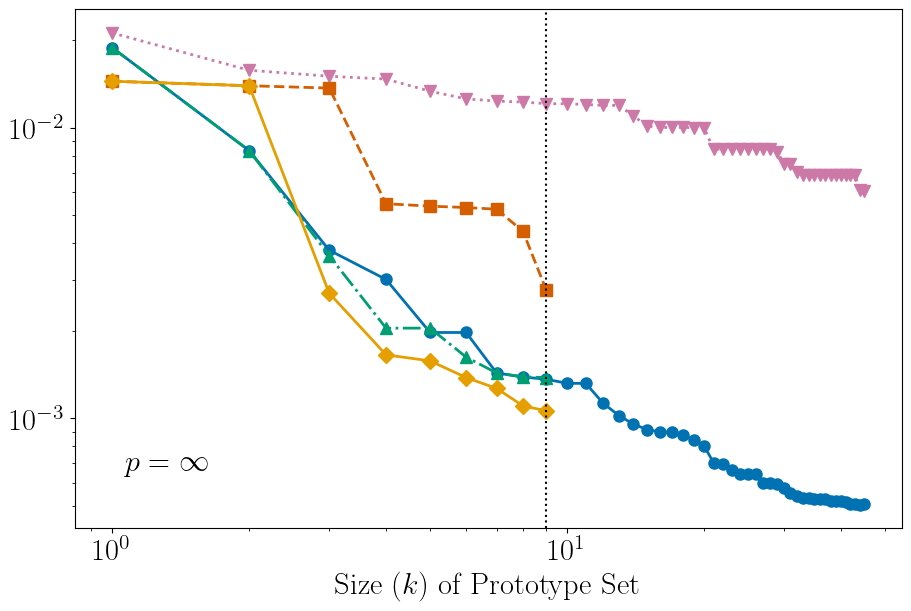

In [35]:
save = True
datasetname = "Pavia"
dataset_lower = 'paviasub'
k = 9
for p in [1,2,3,5, 'inf']:
    filename = f"results/{dataset_lower}_conic_k{k}_p{p}_ns10.pkl"
    with open(filename, "rb") as f:
        data = pickle.load(f)

    plot_energies(filename, methods_all, datasetname, save=save, k=k, k_os=45)


In [5]:
with open("./results/urbansub_conic_k6_p2_ns10.pkl", "rb") as f:
    data = pickle.load(f)
print(data.keys())

dict_keys(['search', 'sampling', 'uniform', 'search_search', 'sampling_sampling', 'sampling_search'])


### plot chosen endmembers for urban

In [76]:
colors = ['b', 'r', 'g', 'm', 'y', 'k']
materials = ['asphalt', 'grass', 'tree', 'roof', 'metal', 'dirt']
method_names = {None: "Mean Endmembers", 
                'sampling': "Adap. Sampling",
                'search' : "Adap. Search",
                'search_search': "Adap. Search \nwith Search Swap",
                'sampling_sampling': "Adap. Sampling \nwith Sampling Swap"}

def plot_endmembers(X, labels, inds=None, title=None, pos=(0,0), save=False, method=None):
    assert pos[0] >= 0 and pos[1] >= 0
    assert pos[0] <= 1 and pos[1] <= 1
    uniq_labels = np.sort(np.unique(labels))
    if inds is not None:
        labels_ind = labels[inds]
    else:
        labels_ind = None 

    if inds is None:
        fig, ax = plt.subplots(figsize=(9,6))
    else:
        fig, ax = plt.subplots(figsize=(9,6), constrained_layout=True)
    for i in uniq_labels:
        s = fr"{materials[i]}"
        if inds is None:
            avg_spec_sig = X[:,labels == i].mean(axis=1)
            ax.plot(np.arange(X.shape[0]), avg_spec_sig, color=colors[i], linestyle='-', marker='', linewidth=2.0, label=s)
        else:
            if i not in labels_ind:
                continue 
            for j in np.where(labels_ind == i)[0]:
                idx = inds[j]
                spec_sig = X[:, idx]
                ax.plot(np.arange(X.shape[0]), spec_sig, color=colors[i], linestyle='-', marker='', linewidth=2.0, label=s)
    ax.set_ylim(0.99*X.min(), 0.185)
    ax.set_xticks([0,50,100,150])
    ax.set_yticks([0.0, 0.05, 0.1, 0.15])
    plt.tick_params(axis='x', labelsize=22)
    plt.tick_params(axis='y', labelsize=22)
    if inds is None:
        ax.set_xlabel("Wavelength Index", fontsize=22)
        ax.set_ylabel("Reflectance", fontsize=22)
        ax.legend(loc='upper right', fontsize=22, bbox_to_anchor=(1.35, 1.0))
    else:
        if pos[0] == 1:
            ax.set_xlabel("Wavelength Index", fontsize=22)
        else:
            ax.set_xticklabels([])
        if pos[1] == 0:
            ax.set_ylabel("Reflectance", fontsize=22)
        else:
            ax.set_yticklabels([])
    
    ax.text(x=0.85-.05*(1*(inds is None)), y=0.95, s=fr"{method_names[method]}", 
        ha='center', va='top', transform=ax.transAxes, 
        fontsize=22)
    if save:
        plt.savefig(f"./figures/{title}.png", format="png", dpi=500, bbox_inches='tight')
    plt.show()

(94249, 162)
(7500, 162)
(162, 7500)
[0 1 2 3 4 5]


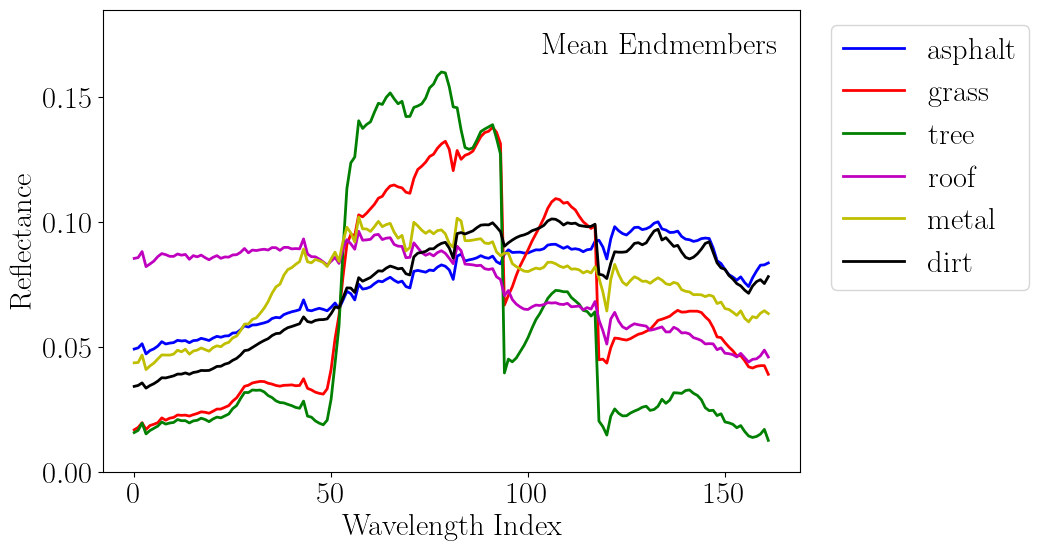

0 (0, 0)
search [0 1 1 2 3 4]


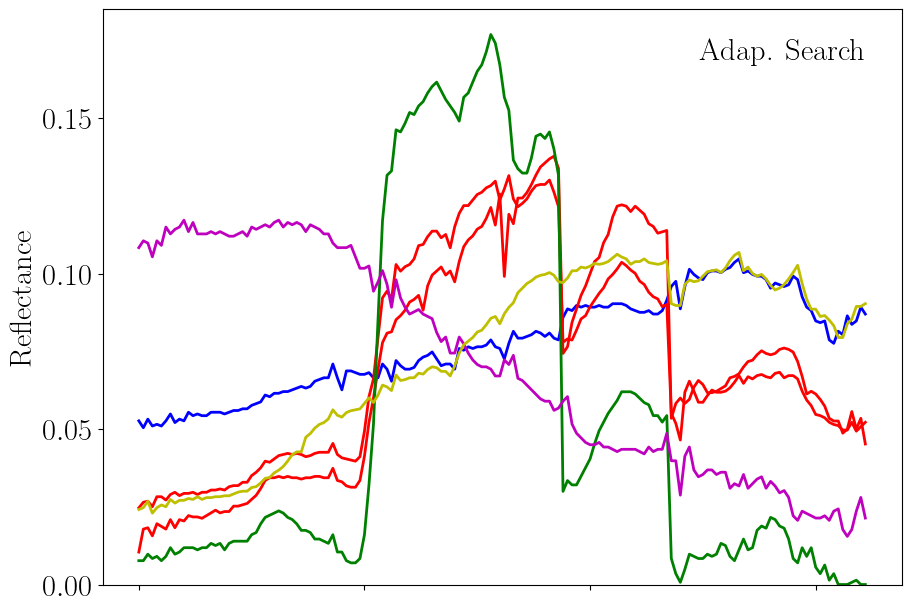

1 (0, 1)
search_search [0 1 2 3 4 5]


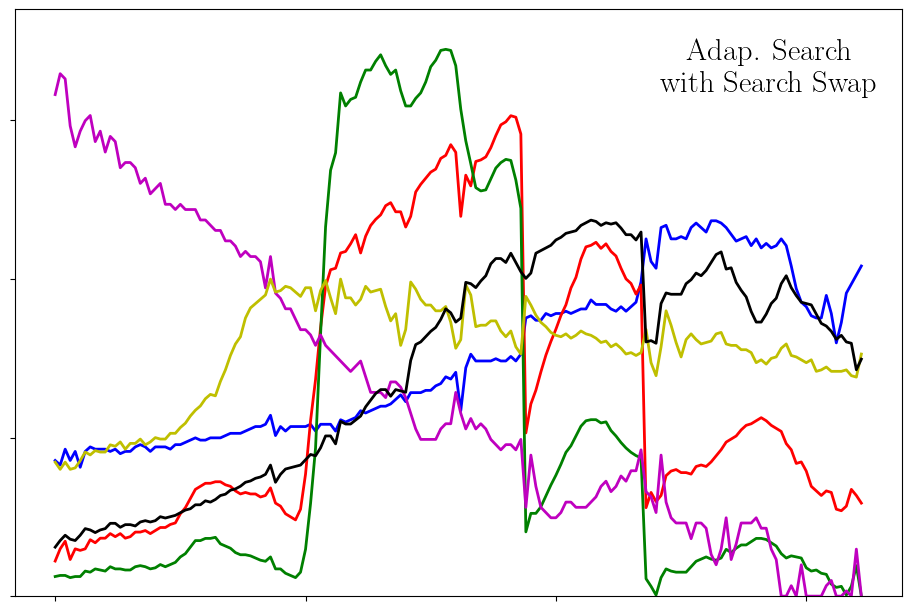

2 (1, 0)
sampling [0 0 2 2 3 5]


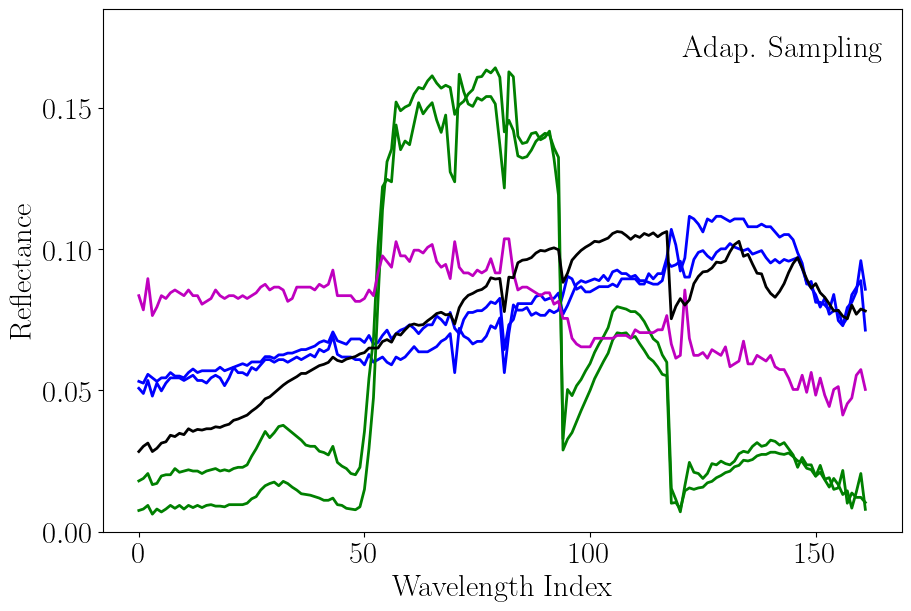

3 (1, 1)
sampling_sampling [1 1 2 2 3 5]


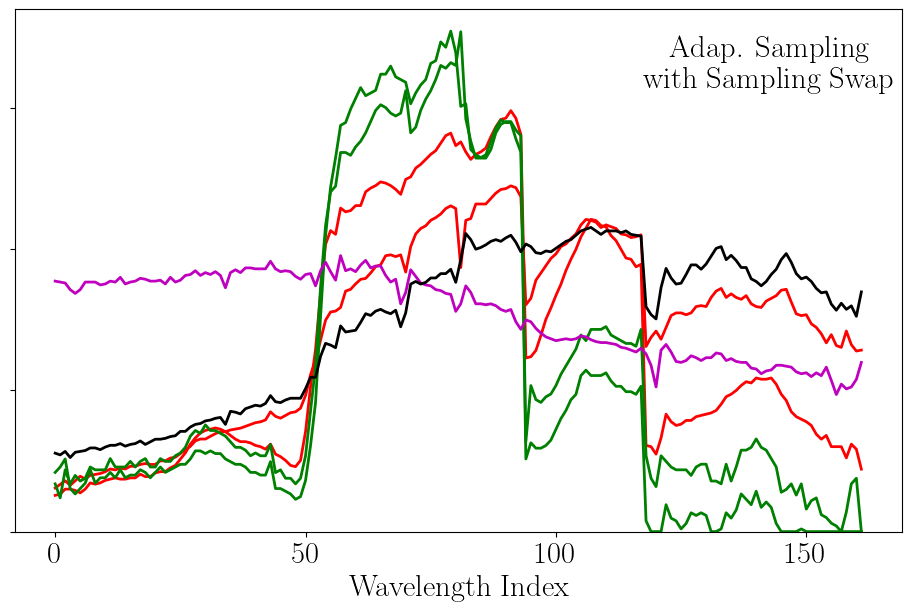

In [77]:
save = True
datasetname = "Urban"
dataset_lower = 'urbansub'
k = 6
X, labels = load_dataset(dataset_lower)
X /= np.linalg.norm(X, axis=0).reshape(1,-1)
print(X.shape)
print(np.unique(labels))

plot_endmembers(X, labels, title=f"{dataset_lower}_avg_endmembers", save=save)



for p in [1]:
    filename = f"results/{dataset_lower}_conic_k{k}_p{p}_ns10.pkl"
    with open(filename, "rb") as f:
        data = pickle.load(f)
    c = 0
    for method in ['search', 'search_search', 'sampling', 'sampling_sampling']:
        pos = (c // 2, c % 2)
        print(c, pos)
        if method == "uniform":
            continue 
        
        if len(method.split("_")) > 1:
            indices = data[method]['indices'][0][-1][:k]
        else:
            indices = data[method]['indices'][0][:k]
        
        labels_indices = labels[indices]
        print(method, np.sort(labels_indices))
        plot_endmembers(X, labels, indices, pos=(c // 2, c % 2), title=f"{dataset_lower}_{p}_{method}_endmembers", save=save, method=method)
        c += 1


    
    


In [67]:
dataset = 'urbansub'
with open (f"./results/{dataset}_conic_k6_p5_ns10.pkl", "rb") as f:
    data = pickle.load(f)
print(data.keys())

X, labels = load_dataset(dataset)
n = X.shape[1]
print(n)

dict_keys(['search', 'sampling', 'uniform', 'search_search', 'sampling_sampling', 'sampling_search'])
(94249, 162)
(7500, 162)
7500


In [68]:
key = 'search_search'
print(key)
print(len(data[key]['energy_values'])) # first dim is number of trials (# of seeds)

if len(key.split("_")) > 1:
    print("swaps method")
    print([len(x) for x in data[key]['energy_values']]) # second dim is number of subset sizes we did
    print([len(x) for x in data[key]['energy_values'][0]]) # third dim is number of swaps in the trial
else:
    print("non-swaps method")
    print([len(x) for x in data[key]['energy_values']]) # second dim is the number of points we chose via this adaptive method

search_search
1
swaps method
[6]
[1, 4, 6, 9, 12, 18]


In [70]:
key = "search_search"
evals_ = [data[key]['energy_values'][i][5] for i in range(len(data[key]['energy_values']))]
maxlen = max([len(x) for x in evals_])
print([len(x) for x in evals_])
evals_ = np.array([np.pad(x, (0, maxlen - len(x)), 'constant', constant_values=np.nan) for x in evals_])
print(evals_.shape)


[18]
(1, 18)


findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following

search (1, 6) (6,)
sampling (10, 30) (30,)
search_search (1, 18) (18,)
sampling_sampling (10, 42) (42,)


findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following

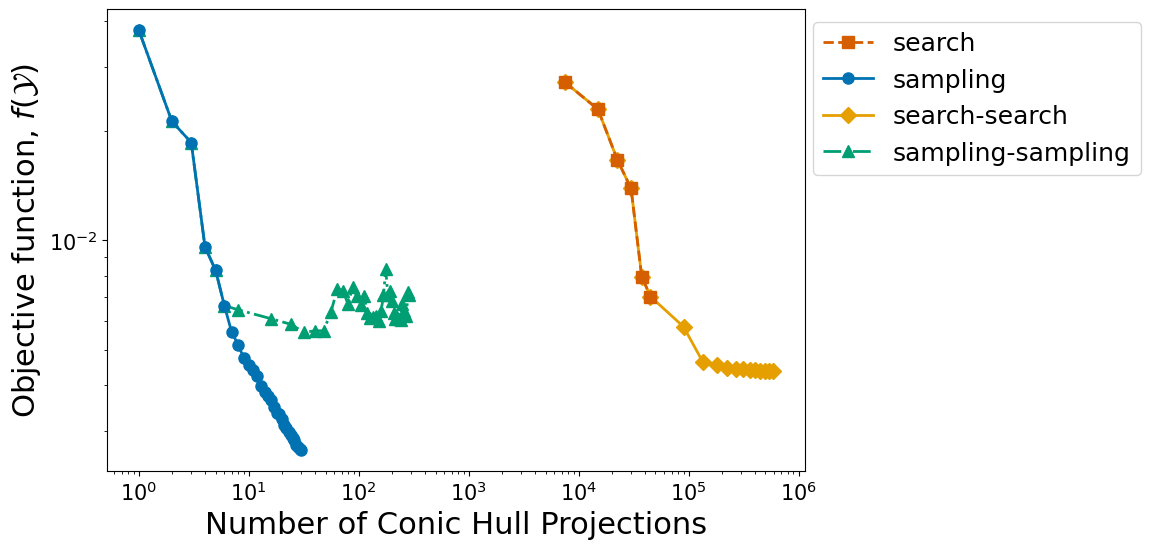

In [88]:
fig, ax = plt.subplots(figsize=(9,6))
k = 6 
for method, dict in data.items():
    if method in ["sampling_search", "uniform"]:
        continue
    if len(method.split("_")) > 1:
        # if swap move method 
        build_method, swap_method = method.split("_")
        evals = [dict['energy_values'][i][k-1] for i in range(len(dict['energy_values']))]
        maxlen = max([len(x) for x in evals])
        evals = np.array([np.pad(x, (0, maxlen - len(x)), 'constant', constant_values=np.nan) for x in evals])
        if build_method == 'sampling':
            x = np.arange(1, k+1)
        elif build_method == 'search':
            x = np.cumsum(np.array([n-i for i in range(k)]))
        else:
            raise ValueError(f"Something wrong with method {method}...")
        
        if swap_method == 'sampling':
            # with each swap move, we do 2 calls to the projeciton onto the conic hull
            x = np.concatenate((x, np.cumsum(x[-1] + (evals.shape[1]-k)*[2])))
        elif swap_method == 'search':
            # with each swap move, we do k(n-k+1) calls to the projection onto the conic hull
            x = np.concatenate((x, x[-1] + np.cumsum((evals.shape[1]-k)*[k*(n-k+1)])))
        else:
            raise ValueError(f"Something wrong with method {method}...")

    else:
        evals = np.array([x for x in dict['energy_values']])
        if method == 'sampling':
            x = np.arange(1, evals.shape[-1]+1) 
        elif method == 'search':
            x = np.cumsum(np.array([n-i for i in range(k)]))
        else:
            continue 
    
    print(method, evals.shape, x.shape)
    evals_mean = np.nanmean(evals, axis=0)   
    evals_std = np.nanstd(evals, axis=0)
        
    ax.plot(x, evals_mean, color=colors[get_idx[method]],
                marker=markers[get_idx[method]], linestyle=linestyles[get_idx[method]],
                linewidth=2.0, label=names[get_idx[method]], markersize=8, zorder=10-get_idx[method])

# ax.set_xlim(2e-2, 1e7)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_autoscale_on(False)
ax.legend(loc='upper right', fontsize=18, bbox_to_anchor=(1.5, 1.0))
ax.set_xlabel(r"Number of Conic Hull Projections", fontsize=22)
ax.set_ylabel(r"Objective function, $f(\mathcal{Y})$", fontsize=22)
plt.show()

# Clustering Results

uniform 25
sampling 25
search 10
sampling_sampling 10
search_search 10


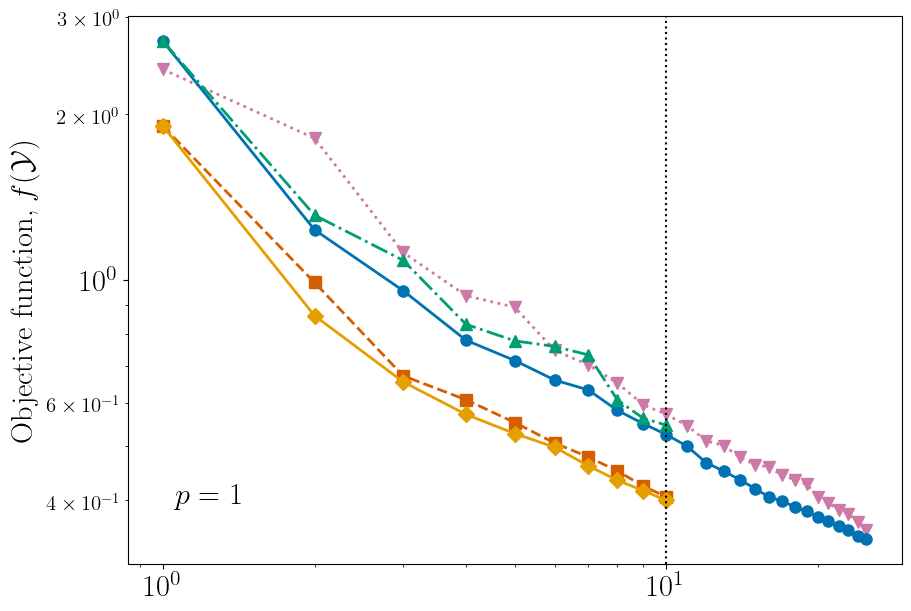

[[np.int64(61), np.int64(7), np.int64(112), np.int64(126), np.int64(69), np.int64(105), np.int64(48), np.int64(86), np.int64(47), np.int64(93)]]
uniform 25
sampling 25
search 10
sampling_sampling 10
search_search 10


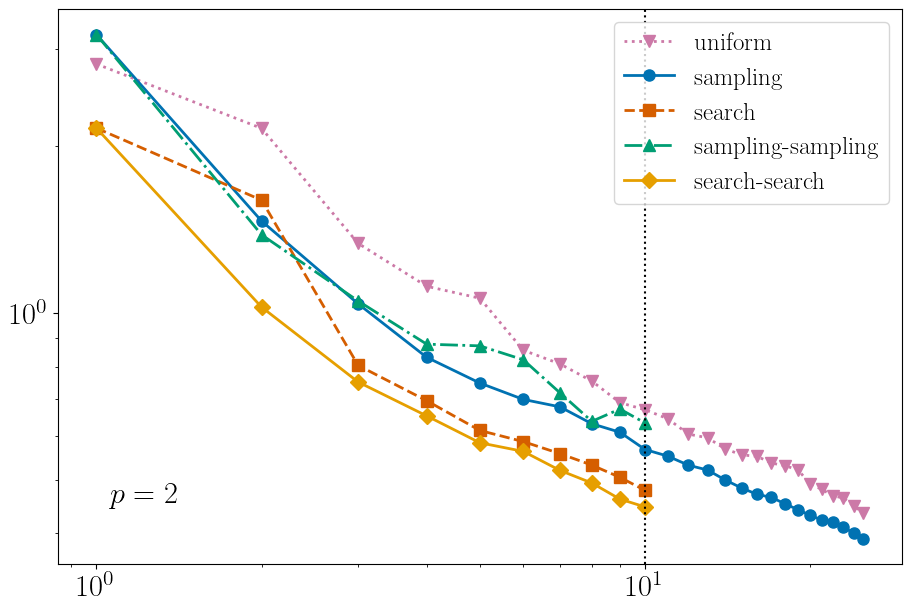

[[np.int64(64), np.int64(7), np.int64(147), np.int64(105), np.int64(78), np.int64(143), np.int64(10), np.int64(89), np.int64(83), np.int64(3)]]
uniform 25
sampling 25
search 10
sampling_sampling 10
search_search 10


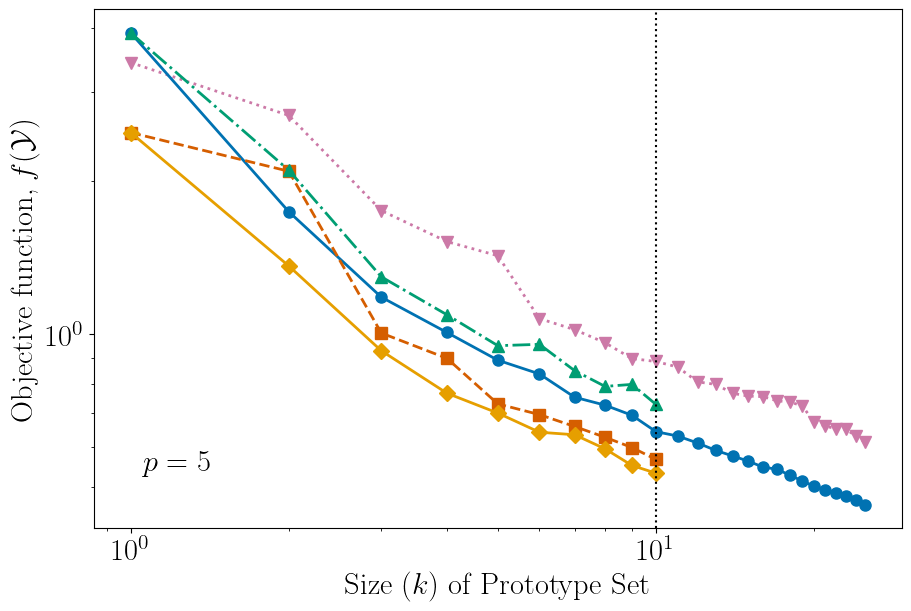

[[np.int64(64), np.int64(112), np.int64(7), np.int64(126), np.int64(105), np.int64(89), np.int64(33), np.int64(8), np.int64(54), np.int64(93)]]
uniform 25
sampling 25
search 10
sampling_sampling 10
search_search 10


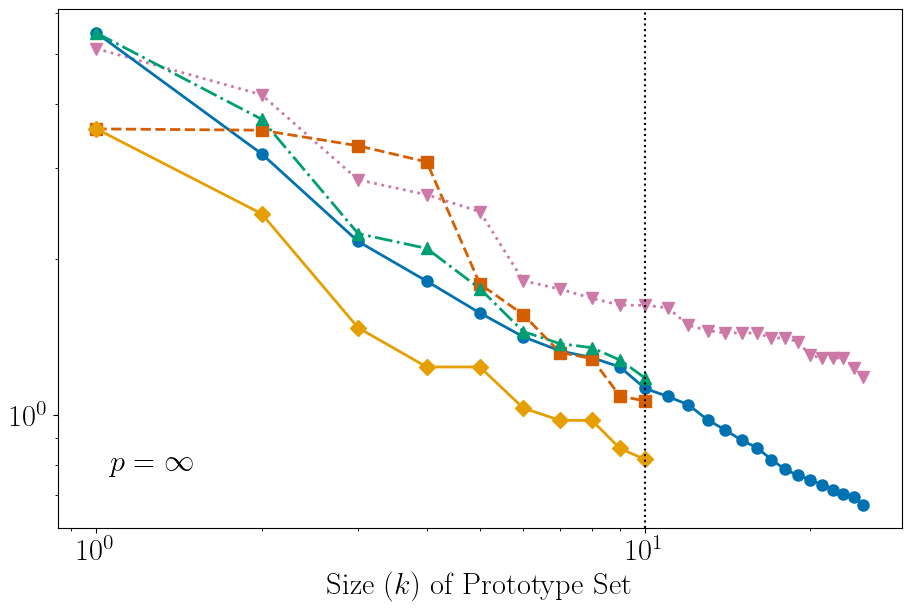

[[np.int64(95), np.int64(59), np.int64(74), np.int64(42), np.int64(120), np.int64(27), np.int64(102), np.int64(147), np.int64(122), np.int64(111)]]


In [37]:
save = True
datasetname = "Iris"
dataset_lower = 'iris'
energy = 'cluster-dense'
k = 10
for p in [1,2,5, 'inf']:
    filename = f"results/{dataset_lower}_{energy}_k{k}_p{p}_ns10.pkl"
    with open(filename, "rb") as f:
        data = pickle.load(f)

    plot_energies(filename, methods_all, datasetname, save=save, k=k, k_os=25)
    print(data['search']['indices'])

['search', 'sampling', 'uniform', 'search_search', 'sampling_sampling', 'sampling_search']
search 5
sampling 25
uniform 25
search_search 5
sampling_sampling 5
sampling_search 5


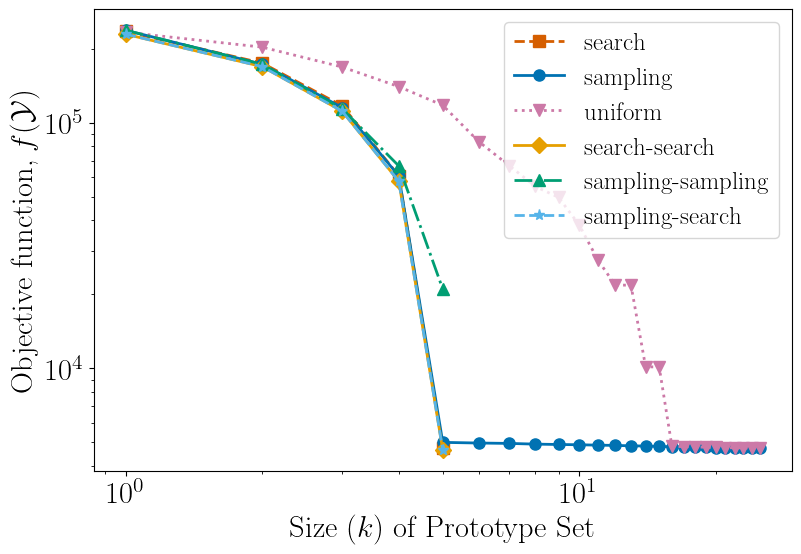

[[np.int64(753), np.int64(1093), np.int64(2021), np.int64(1547), np.int64(1508)]]
['search', 'sampling', 'uniform', 'search_search', 'sampling_sampling', 'sampling_search']
search 5
sampling 25
uniform 25
search_search 5
sampling_sampling 5
sampling_search 5


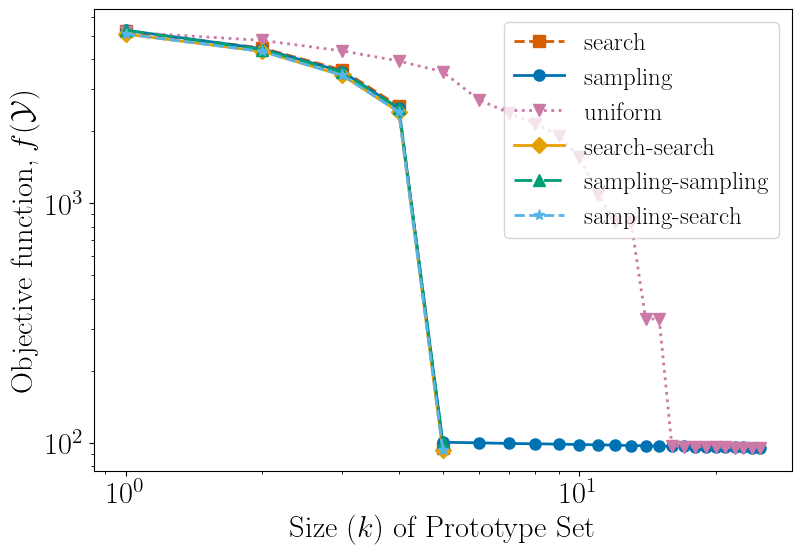

[[np.int64(1188), np.int64(1093), np.int64(2021), np.int64(1547), np.int64(1508)]]
['search', 'sampling', 'uniform', 'search_search', 'sampling_sampling', 'sampling_search']
search 5
sampling 25
uniform 25
search_search 5
sampling_sampling 5
sampling_search 5


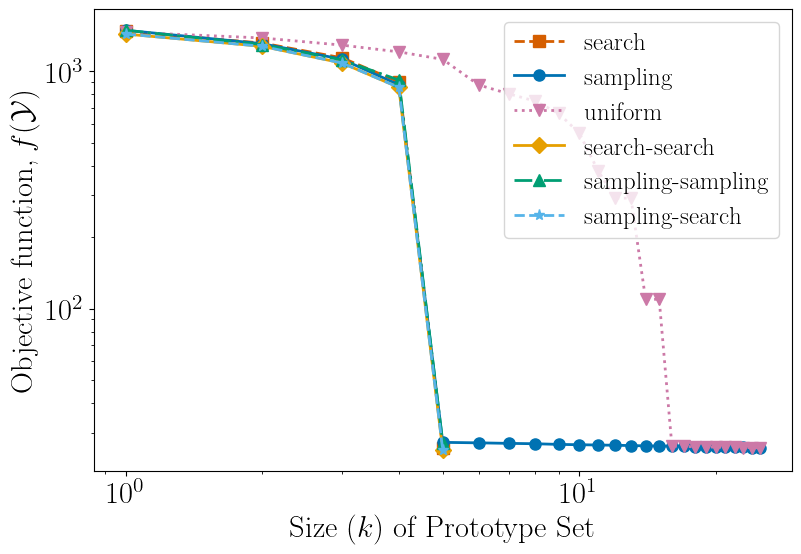

[[np.int64(1188), np.int64(1093), np.int64(2021), np.int64(1547), np.int64(1508)]]
['search', 'sampling', 'uniform', 'search_search', 'sampling_sampling', 'sampling_search']
search 5
sampling 25
uniform 25
search_search 5
sampling_sampling 5
sampling_search 5


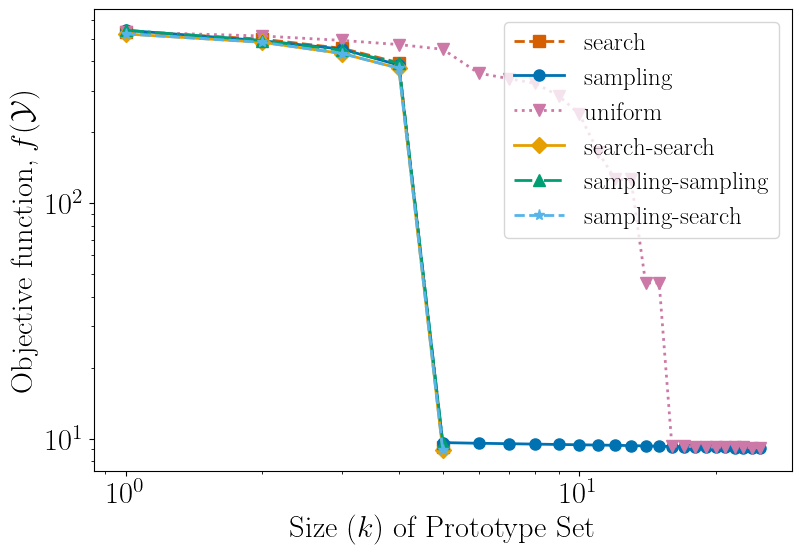

[[np.int64(1188), np.int64(1093), np.int64(2021), np.int64(1547), np.int64(1508)]]
['search', 'sampling', 'uniform', 'search_search', 'sampling_sampling', 'sampling_search']
search 5
sampling 25
uniform 25
search_search 5
sampling_sampling 5
sampling_search 5


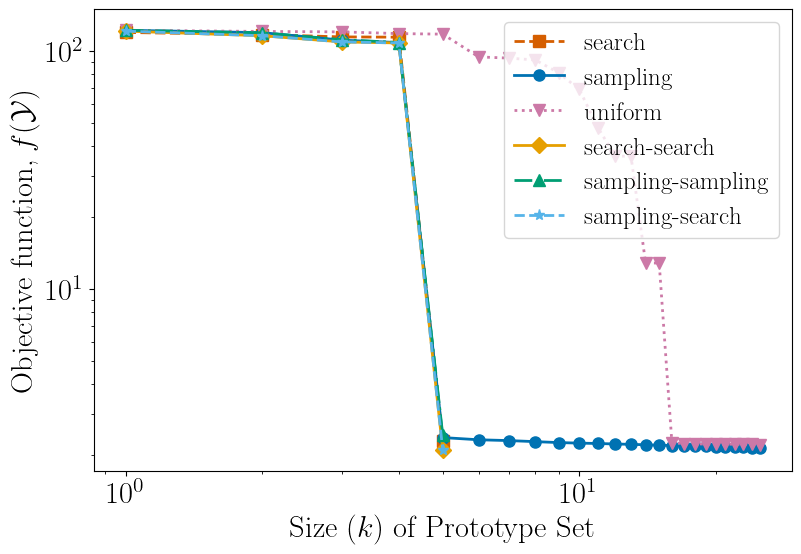

[[np.int64(505), np.int64(1540), np.int64(526), np.int64(2242), np.int64(2137)]]


In [17]:
save = True
datasetname = "Blobs"
dataset_lower = 'blobs'
energy = 'cluster-dense'
k = 5
for p in [1,2,3,5, 'inf']:
    filename = f"results/{dataset_lower}_{energy}_k{k}_p{p}_ns10.pkl"
    with open(filename, "rb") as f:
        data = pickle.load(f)

    to_plot = list(data.keys())
    print(to_plot)
    plot_energies(filename, to_plot, datasetname, save=save, k=k, k_os=25)

    print(data['search']['indices'])

['search', 'sampling', 'uniform', 'search_search', 'sampling_sampling', 'sampling_search']
search 11
sampling 25
uniform 25
search_search 11
sampling_sampling 11
sampling_search 11


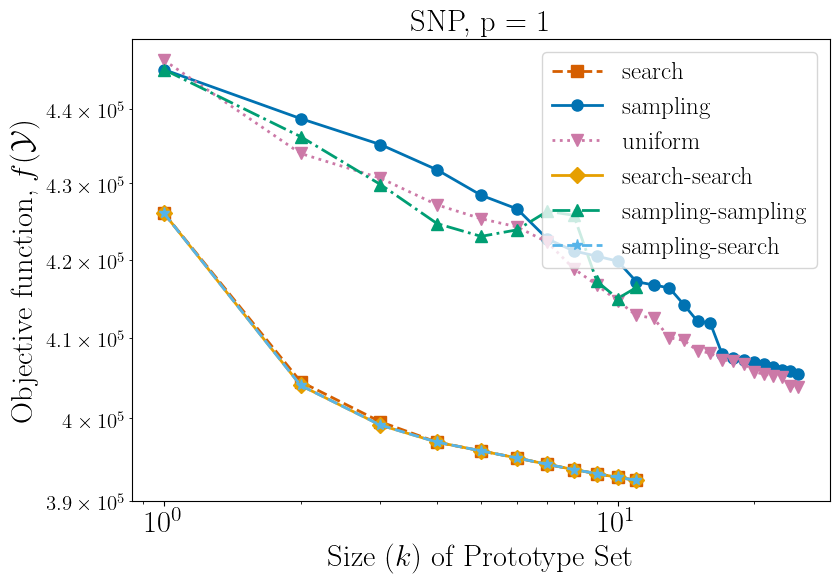

[[np.int64(12974), np.int64(14078), np.int64(5666), np.int64(12910), np.int64(8128), np.int64(3359), np.int64(1242), np.int64(4985), np.int64(1577), np.int64(3397), np.int64(9204)]]
['search', 'sampling', 'uniform', 'search_search', 'sampling_sampling', 'sampling_search']
search 11
sampling 25
uniform 25
search_search 11
sampling_sampling 11
sampling_search 11


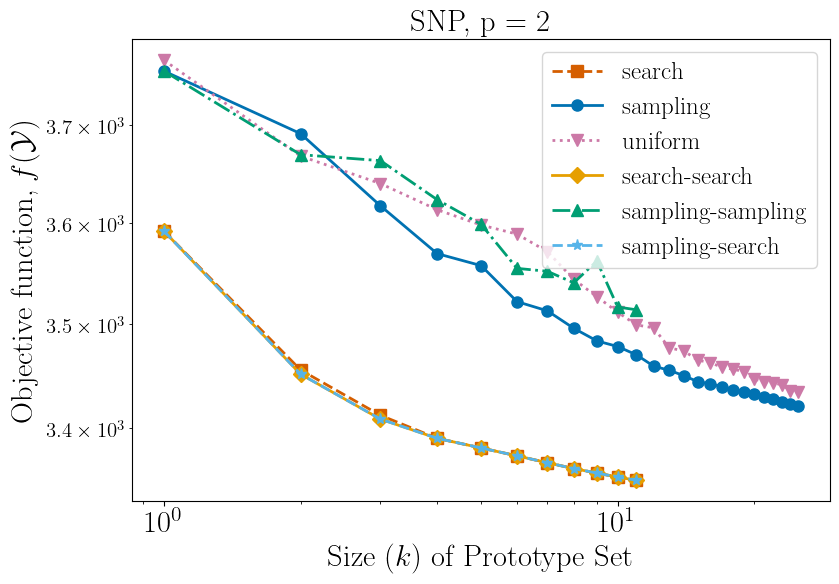

[[np.int64(12974), np.int64(14078), np.int64(5666), np.int64(12910), np.int64(8128), np.int64(3359), np.int64(1242), np.int64(4985), np.int64(1577), np.int64(3397), np.int64(9204)]]
['search', 'sampling', 'uniform', 'search_search', 'sampling_sampling', 'sampling_search']
search 11
sampling 25
uniform 25
search_search 11
sampling_sampling 11
sampling_search 11


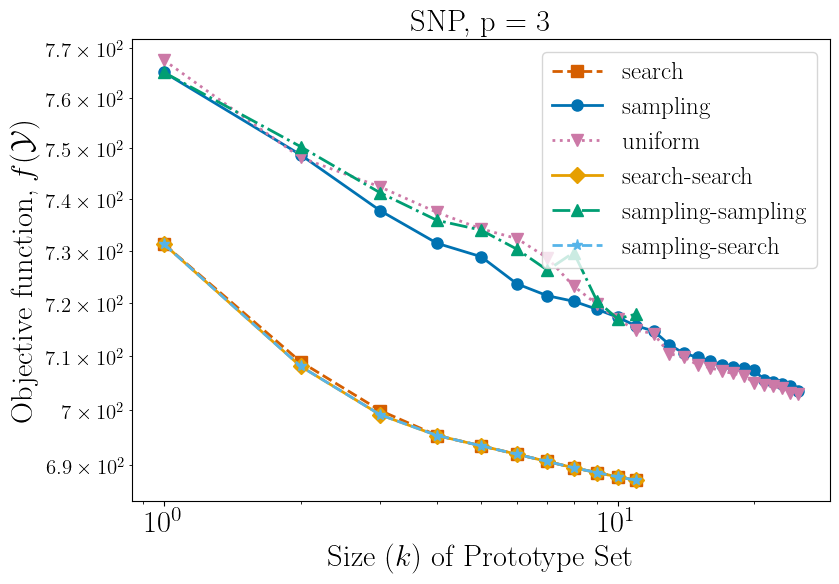

[[np.int64(12974), np.int64(14078), np.int64(5666), np.int64(12910), np.int64(8128), np.int64(3359), np.int64(1242), np.int64(4985), np.int64(1577), np.int64(3397), np.int64(9204)]]
['search', 'sampling', 'uniform', 'search_search', 'sampling_sampling', 'sampling_search']
search 11
sampling 25
uniform 25
search_search 11
sampling_sampling 11
sampling_search 11


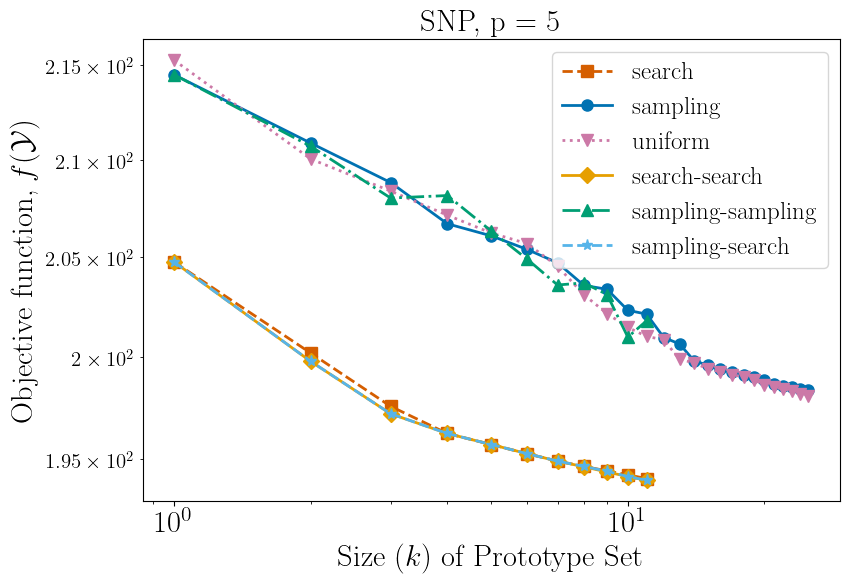

[[np.int64(12974), np.int64(10234), np.int64(5666), np.int64(12910), np.int64(8128), np.int64(3359), np.int64(4985), np.int64(1577), np.int64(3397), np.int64(1242), np.int64(9204)]]
['search', 'sampling', 'uniform', 'search_search', 'sampling_sampling', 'sampling_search']
search 11
sampling 25
uniform 25
search_search 11
sampling_sampling 11
sampling_search 11


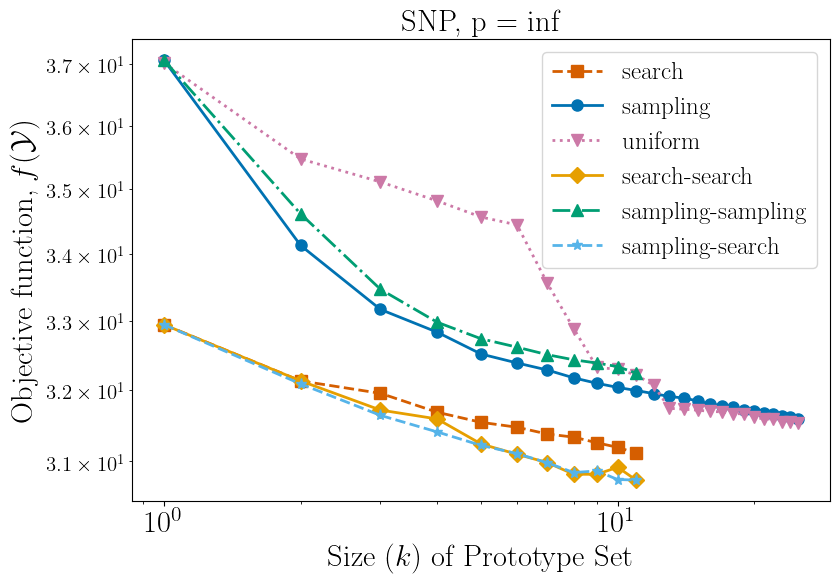

[[np.int64(12974), np.int64(10259), np.int64(1370), np.int64(13953), np.int64(9692), np.int64(3833), np.int64(4426), np.int64(9667), np.int64(13329), np.int64(9426), np.int64(1300)]]


In [63]:
save = False
datasetname = "SNP"
dataset_lower = 'snp'
energy = 'cluster-dense'
k = 11
for p in [1,2,3,5, 'inf']:
    filename = f"results/{dataset_lower}_{energy}_k{k}_p{p}_ns10.pkl"
    with open(filename, "rb") as f:
        data = pickle.load(f)

    to_plot = list(data.keys())
    print(to_plot)
    plot_energies(filename, to_plot, datasetname, save=save, k=k, k_os=25)
    print(data['search']['indices'])

## Clustering todo

* MNIST and FASHIONMNIST?

['search', 'sampling', 'uniform', 'search_search', 'sampling_sampling', 'sampling_search', 'reference']
search 10
sampling 50
uniform 50
search_search 10
sampling_sampling 10
sampling_search 10


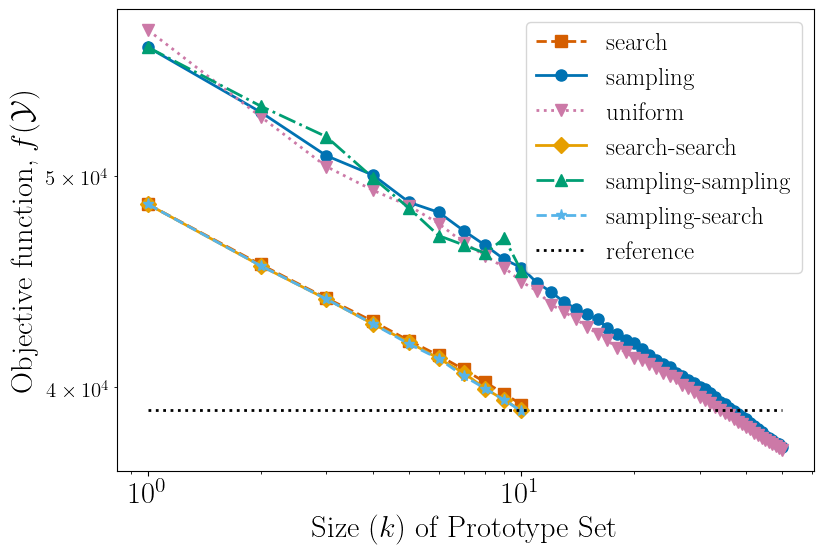

[[np.int64(8481), np.int64(8113), np.int64(7807), np.int64(278), np.int64(1487), np.int64(4570), np.int64(6576), np.int64(1272), np.int64(3395), np.int64(2356), np.int64(5651), np.int64(7184), np.int64(9784), np.int64(4389), np.int64(296), np.int64(1398), np.int64(6042), np.int64(2567), np.int64(3121), np.int64(5478)]]
['search', 'sampling', 'uniform', 'search_search', 'sampling_sampling', 'sampling_search', 'reference']
search 10
sampling 50
uniform 50
search_search 10
sampling_sampling 10
sampling_search 10


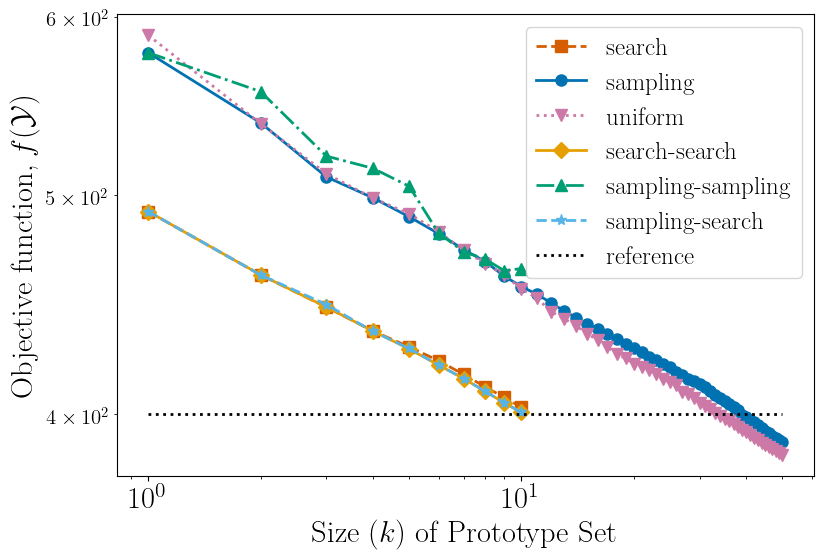

[[np.int64(8113), np.int64(8481), np.int64(7807), np.int64(7), np.int64(1312), np.int64(6576), np.int64(4570), np.int64(1272), np.int64(653), np.int64(5651), np.int64(2567), np.int64(3395), np.int64(7184), np.int64(4389), np.int64(9541), np.int64(590), np.int64(6042), np.int64(8472), np.int64(1745), np.int64(3121)]]
['search', 'sampling', 'uniform', 'search_search', 'sampling_sampling', 'sampling_search', 'reference']
search 10
sampling 50
uniform 50
search_search 10
sampling_sampling 10
sampling_search 10


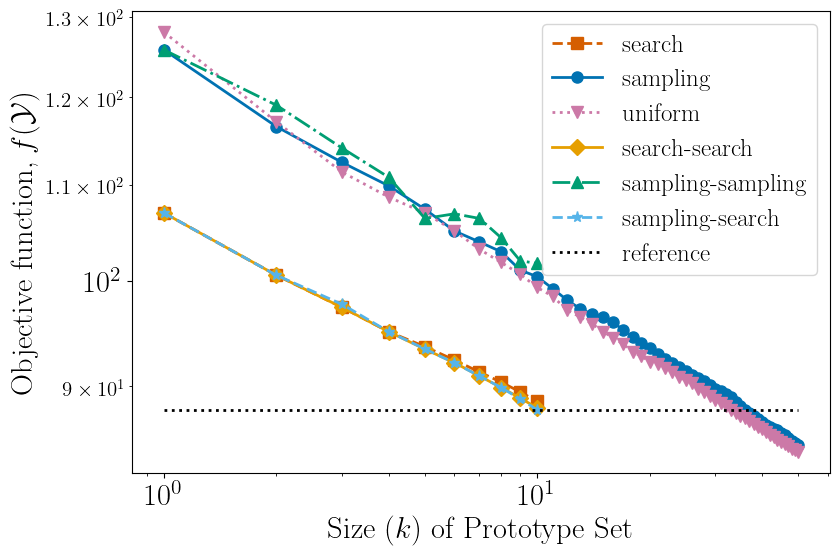

[[np.int64(8113), np.int64(8481), np.int64(7), np.int64(7807), np.int64(2356), np.int64(9063), np.int64(6576), np.int64(5651), np.int64(1487), np.int64(3395), np.int64(4449), np.int64(296), np.int64(1272), np.int64(2567), np.int64(7184), np.int64(8472), np.int64(9541), np.int64(6278), np.int64(4389), np.int64(3121)]]
['search', 'sampling', 'uniform', 'search_search', 'sampling_sampling', 'sampling_search', 'reference']
search 10
sampling 50
uniform 50
search_search 10
sampling_sampling 10
sampling_search 10


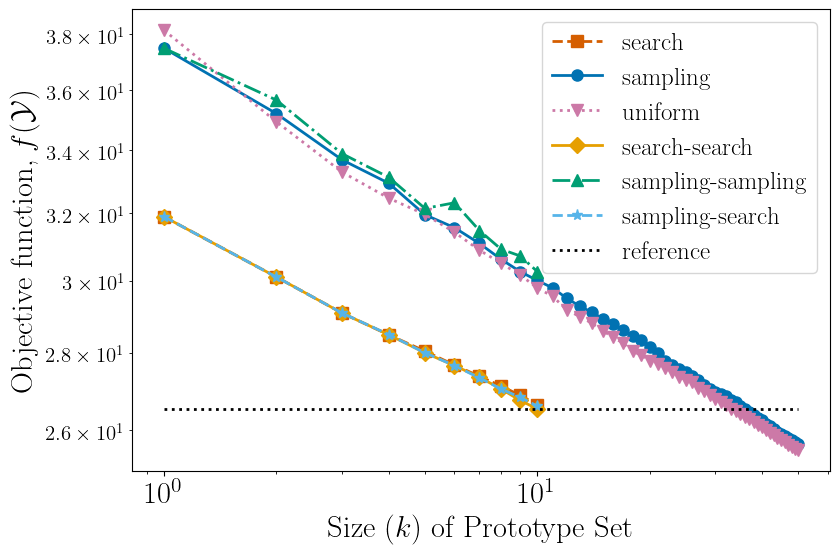

[[np.int64(8113), np.int64(8481), np.int64(7), np.int64(7261), np.int64(2356), np.int64(9063), np.int64(6167), np.int64(5651), np.int64(4074), np.int64(3202), np.int64(503), np.int64(2124), np.int64(8472), np.int64(1961), np.int64(9541), np.int64(6576), np.int64(3367), np.int64(4389), np.int64(2303), np.int64(7238)]]
['search', 'sampling', 'uniform', 'search_search', 'sampling_sampling', 'sampling_search', 'reference']
search 10
sampling 50
uniform 50
search_search 10
sampling_sampling 10
sampling_search 10


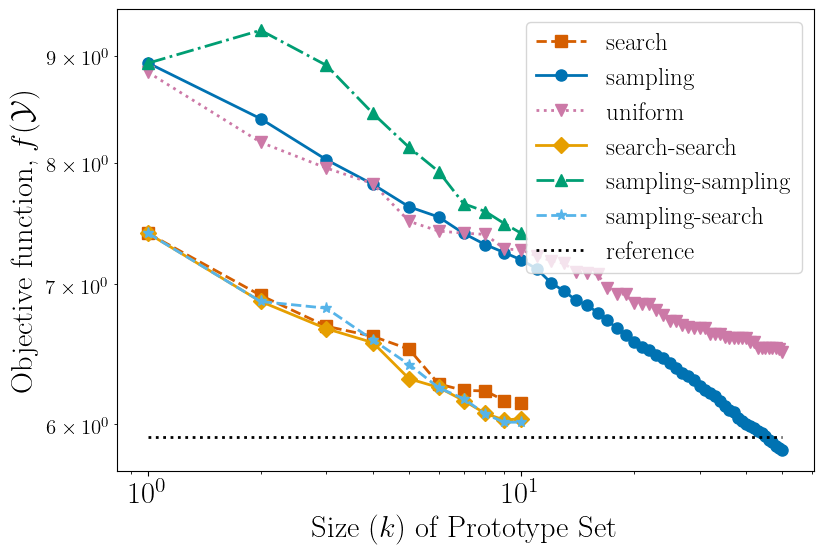

[[np.int64(8713), np.int64(3274), np.int64(2356), np.int64(159), np.int64(3991), np.int64(8046), np.int64(9369), np.int64(3980), np.int64(8453), np.int64(3644), np.int64(7478), np.int64(4596), np.int64(4493), np.int64(2240), np.int64(2366), np.int64(717), np.int64(9159), np.int64(3), np.int64(54), np.int64(9507)]]


In [39]:
save = True
datasetname = "MNIST"
dataset_lower = 'mnist'
energy = 'cluster-dense'
k = 20
for p in [1,2,3,5, 'inf']:
    filename = f"results/{dataset_lower}_{energy}_k{k}_p{p}_ns10.pkl"
    with open(filename, "rb") as f:
        data = pickle.load(f)

    to_plot = list(data.keys())
    print(to_plot)
    plot_energies(filename, to_plot, datasetname, save=save, k=10, k_os=50)
    print(data['search']['indices'])

['search', 'sampling', 'uniform', 'search_search', 'sampling_sampling', 'sampling_search', 'reference']
search 10
sampling 50
uniform 50
search_search 10
sampling_sampling 10
sampling_search 10


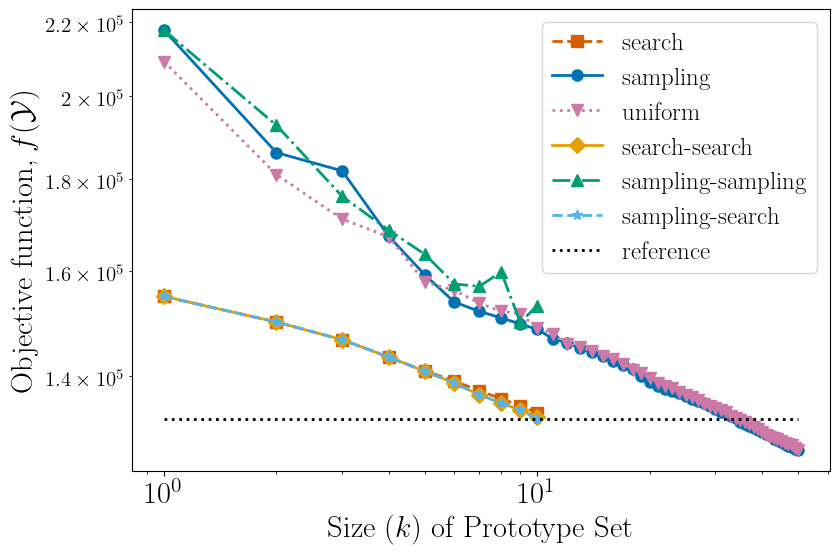

[[np.int64(9890), np.int64(1444), np.int64(7635), np.int64(6256), np.int64(5647), np.int64(8648), np.int64(9236), np.int64(713), np.int64(5808), np.int64(1438), np.int64(4303), np.int64(2864), np.int64(7153), np.int64(8662), np.int64(5639), np.int64(6352), np.int64(7527), np.int64(4209), np.int64(1377), np.int64(5933)]]
['search', 'sampling', 'uniform', 'search_search', 'sampling_sampling', 'sampling_search', 'reference']
search 10
sampling 50
uniform 50
search_search 10
sampling_sampling 10
sampling_search 10


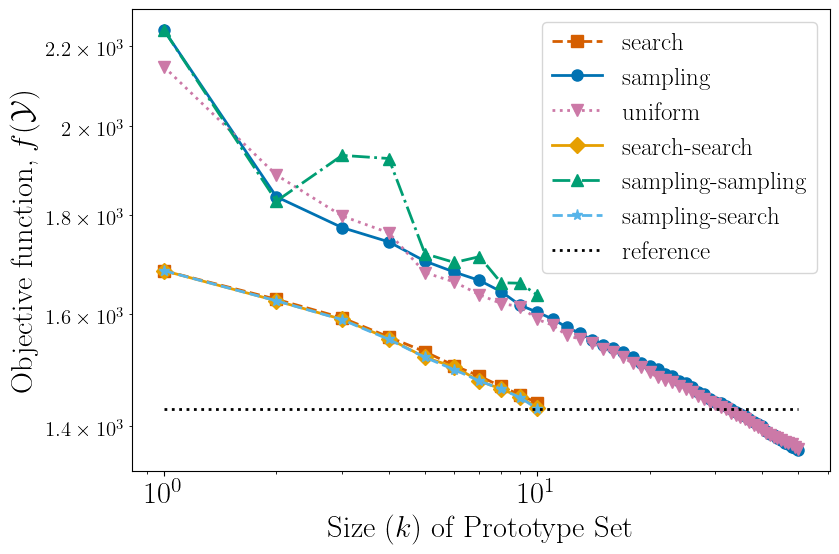

[[np.int64(3781), np.int64(1444), np.int64(6671), np.int64(7897), np.int64(994), np.int64(5484), np.int64(9006), np.int64(4022), np.int64(1427), np.int64(8838), np.int64(2878), np.int64(3765), np.int64(582), np.int64(5639), np.int64(7527), np.int64(1377), np.int64(6352), np.int64(4209), np.int64(5704), np.int64(8516)]]
['search', 'sampling', 'uniform', 'search_search', 'sampling_sampling', 'sampling_search', 'reference']
search 10
sampling 50
uniform 50
search_search 10
sampling_sampling 10
sampling_search 10


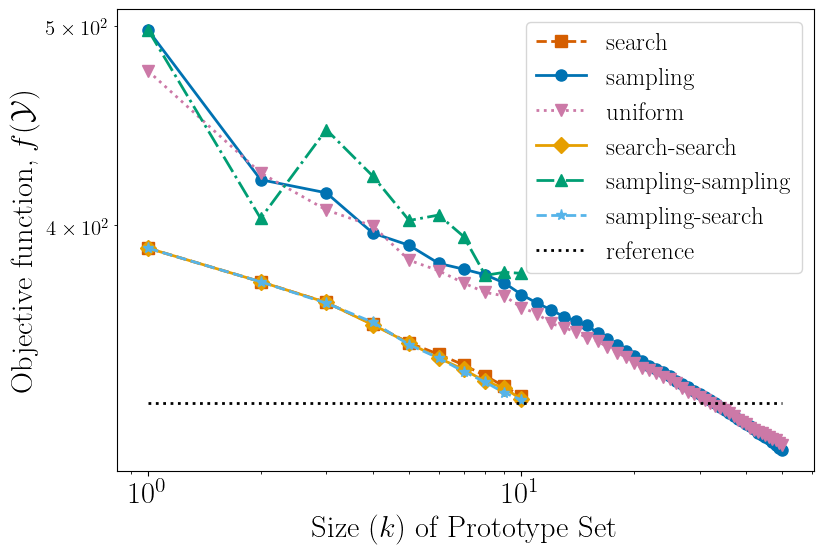

[[np.int64(3781), np.int64(1444), np.int64(6889), np.int64(7299), np.int64(5467), np.int64(994), np.int64(9006), np.int64(4148), np.int64(1504), np.int64(2878), np.int64(8838), np.int64(3835), np.int64(713), np.int64(7527), np.int64(1096), np.int64(5156), np.int64(5704), np.int64(6352), np.int64(2330), np.int64(4303)]]
['search', 'sampling', 'uniform', 'search_search', 'sampling_sampling', 'sampling_search', 'reference']
search 10
sampling 50
uniform 50
search_search 10
sampling_sampling 10
sampling_search 10


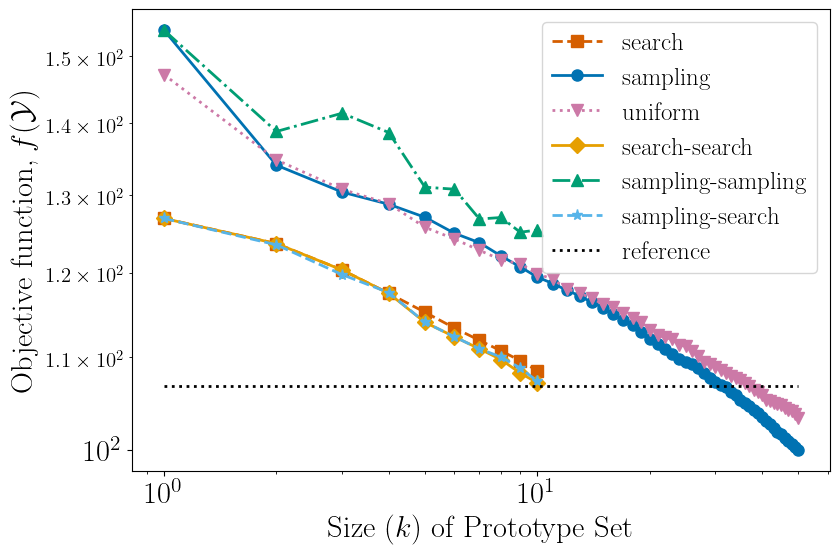

[[np.int64(1225), np.int64(5048), np.int64(7635), np.int64(6795), np.int64(1316), np.int64(5933), np.int64(9381), np.int64(2482), np.int64(8057), np.int64(3365), np.int64(7153), np.int64(4148), np.int64(5484), np.int64(1020), np.int64(3413), np.int64(7527), np.int64(7723), np.int64(2695), np.int64(323), np.int64(6352)]]
['search', 'sampling', 'uniform', 'search_search', 'sampling_sampling', 'sampling_search', 'reference']
search 10
sampling 50
uniform 50
search_search 10
sampling_sampling 10
sampling_search 10


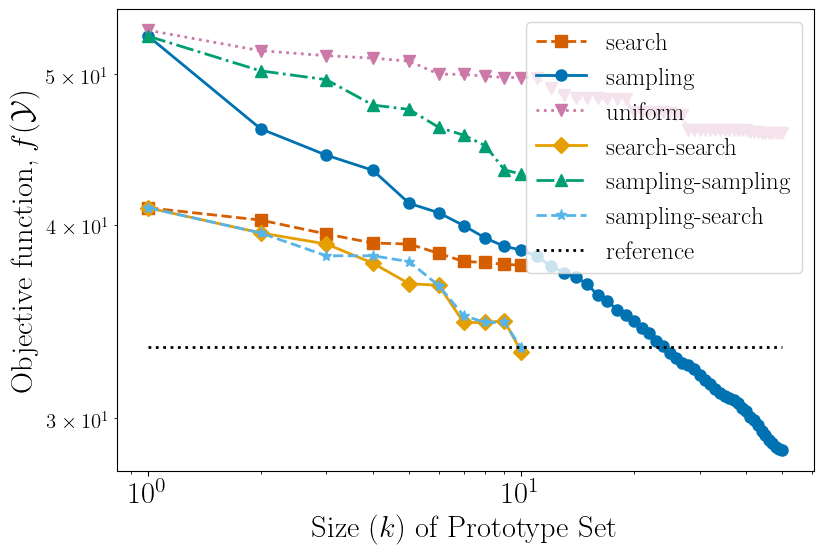

[[np.int64(5598), np.int64(5464), np.int64(4428), np.int64(5989), np.int64(7908), np.int64(5617), np.int64(3280), np.int64(1141), np.int64(5048), np.int64(5095), np.int64(3996), np.int64(1113), np.int64(7995), np.int64(6150), np.int64(7541), np.int64(2686), np.int64(1605), np.int64(7609), np.int64(1961), np.int64(6209)]]


In [40]:
save = True
datasetname = "CIFAR10"
dataset_lower = 'cifar10'
energy = 'cluster-dense'
k = 20
for p in [1,2,3,5, 'inf']:
    filename = f"results/{dataset_lower}_{energy}_k{k}_p{p}_ns10.pkl"
    with open(filename, "rb") as f:
        data = pickle.load(f)

    to_plot = list(data.keys())
    print(to_plot)
    plot_energies(filename, to_plot, datasetname, save=save, k=10, k_os=50)
    print(data['search']['indices'])

['search', 'sampling', 'uniform', 'search_search', 'sampling_sampling', 'sampling_search', 'reference']
search 20
sampling 50
uniform 50
search_search 20
sampling_sampling 20
sampling_search 20


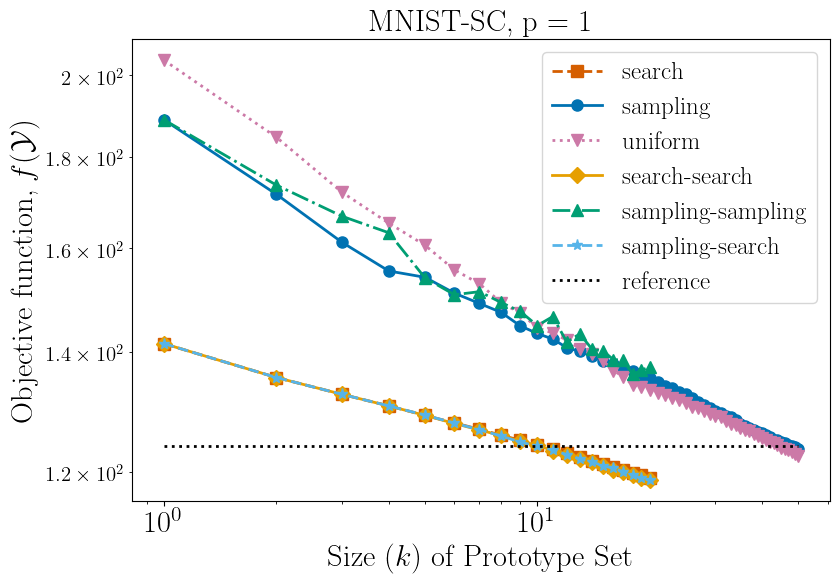

[[np.int64(148), np.int64(1246), np.int64(1390), np.int64(1276), np.int64(1982), np.int64(6384), np.int64(6377), np.int64(3685), np.int64(1817), np.int64(1217), np.int64(18), np.int64(6144), np.int64(1210), np.int64(8093), np.int64(2277), np.int64(5082), np.int64(2086), np.int64(4584), np.int64(9849), np.int64(1108)]]
['search', 'sampling', 'uniform', 'search_search', 'sampling_sampling', 'sampling_search', 'reference']
search 20
sampling 50
uniform 50
search_search 20
sampling_sampling 20
sampling_search 20


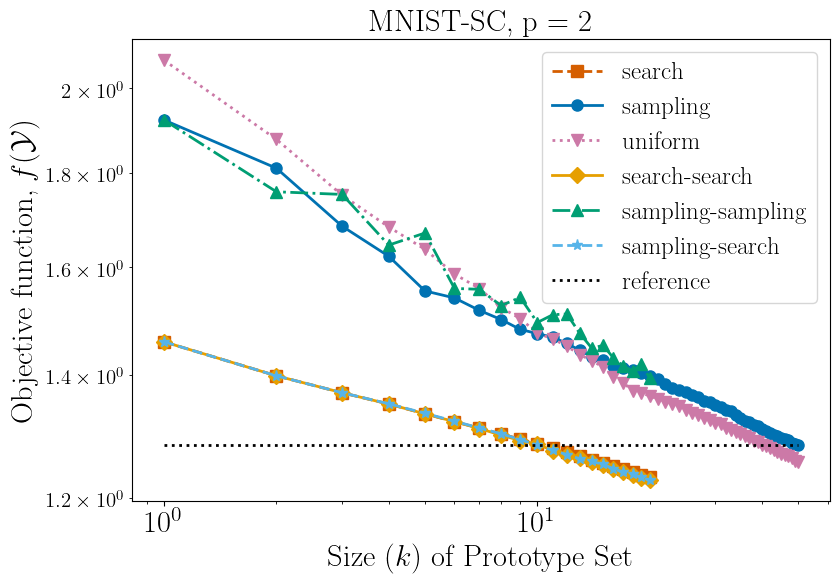

[[np.int64(148), np.int64(1246), np.int64(1390), np.int64(1276), np.int64(1982), np.int64(6384), np.int64(6377), np.int64(9406), np.int64(9643), np.int64(1669), np.int64(5909), np.int64(7262), np.int64(2872), np.int64(3748), np.int64(6704), np.int64(5736), np.int64(7927), np.int64(3579), np.int64(6530), np.int64(7975)]]
['search', 'sampling', 'uniform', 'search_search', 'sampling_sampling', 'sampling_search', 'reference']
search 20
sampling 50
uniform 50
search_search 20
sampling_sampling 20
sampling_search 20


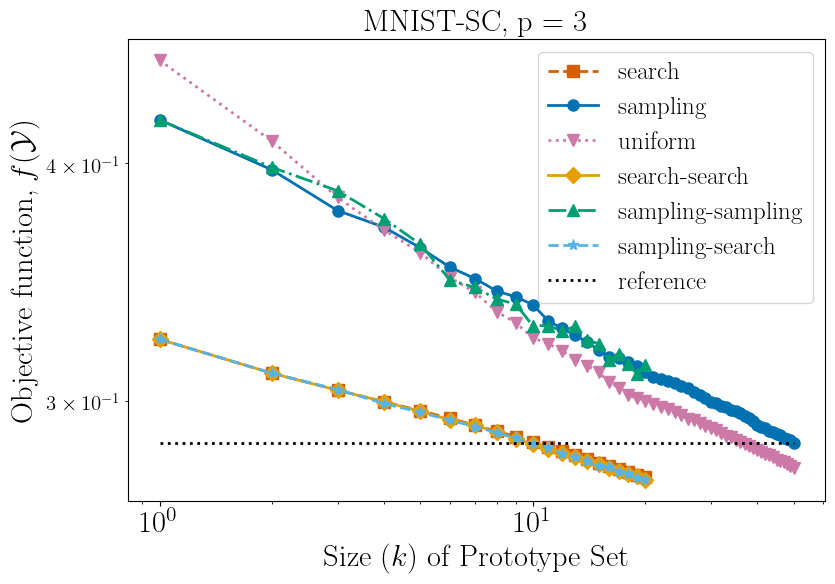

[[np.int64(148), np.int64(1246), np.int64(1390), np.int64(4500), np.int64(7437), np.int64(6012), np.int64(3222), np.int64(3461), np.int64(2409), np.int64(1116), np.int64(1716), np.int64(6904), np.int64(5716), np.int64(6576), np.int64(1070), np.int64(2369), np.int64(3387), np.int64(694), np.int64(9259), np.int64(7767)]]
['search', 'sampling', 'uniform', 'search_search', 'sampling_sampling', 'sampling_search', 'reference']
search 20
sampling 50
uniform 50
search_search 20
sampling_sampling 20
sampling_search 20


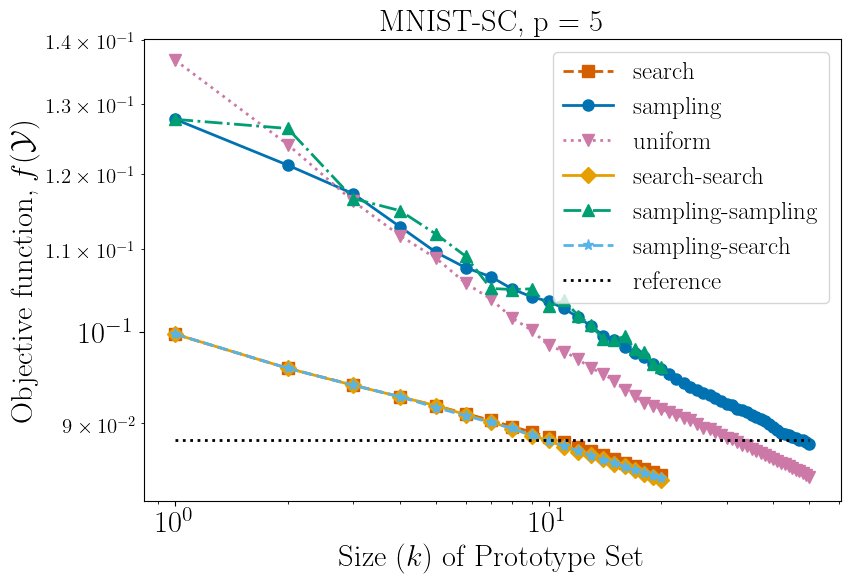

[[np.int64(148), np.int64(6583), np.int64(9959), np.int64(1126), np.int64(5082), np.int64(9529), np.int64(1513), np.int64(7755), np.int64(9572), np.int64(2915), np.int64(9379), np.int64(7276), np.int64(9322), np.int64(1067), np.int64(4224), np.int64(2086), np.int64(3469), np.int64(2111), np.int64(2221), np.int64(3927)]]
['search', 'sampling', 'uniform', 'search_search', 'sampling_sampling', 'sampling_search', 'reference']
search 20
sampling 50
uniform 50
search_search 20
sampling_sampling 20
sampling_search 20


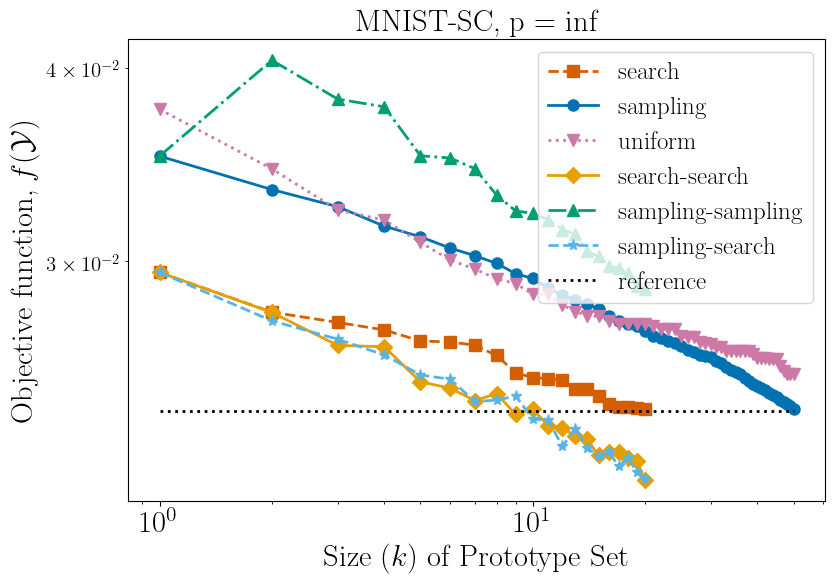

[[np.int64(1424), np.int64(6877), np.int64(1851), np.int64(8149), np.int64(9975), np.int64(6650), np.int64(4193), np.int64(2746), np.int64(377), np.int64(4925), np.int64(4182), np.int64(2439), np.int64(3496), np.int64(3652), np.int64(8469), np.int64(7038), np.int64(5229), np.int64(1373), np.int64(5957), np.int64(3511)]]


In [6]:
save = False
datasetname = "MNIST-SC"
dataset_lower = 'mnistsc'
energy = 'cluster-dense'
k = 20
for p in [1,2,3,5, 'inf']:
    filename = f"results/{dataset_lower}_{energy}_k{k}_p{p}_ns10.pkl"
    with open(filename, "rb") as f:
        data = pickle.load(f)

    to_plot = list(data.keys())
    print(to_plot)
    plot_energies(filename, to_plot, datasetname, save=save, k=k, k_os=50)
    print(data['search']['indices'])

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_digits
from sklearn.metrics import pairwise_distances


data_names = ["iris", "wine", "breastcancer", "digits"]
loaders = [load_iris, load_wine, load_breast_cancer, load_digits]

In [82]:
save = False
plot = False 

for data_name, loader in zip(data_names, loaders):
    if data_name != "digits":
        k = 10
        continue
    else:
        k = 15
    X, y = loader(return_X_y=True)
    names = loader(as_frame=True).target_names 
    labels_true = names[y]
    k_to_show = len(names)


    for p in [1,2,3,5,'inf']:
        filename = f"results/{data_name}_cluster-dense_k{15}_p{p}_ns10.pkl"
        with open(filename, "rb") as f:
            data = pickle.load(f)
        for method, dict in data.items():
            if method == 'reference':
                continue
            if len(dict['indices']) > 0:
                try:
                    inds = np.array(dict['indices'])[:,:k_to_show]
                except:
                    inds = np.array([idxs[k_to_show-1] for idxs in dict['indices']]).reshape(-1,k_to_show)
            else:
                inds = np.array(dict['indices'][0])[:k_to_show].reshape(1,-1)

            cm = np.zeros((k_to_show, k_to_show), dtype=float)
            for i in range(inds.shape[0]):
                centroids, centroid_labels = X[inds[i,:]], labels_true[inds[i,:]]
                dists = pairwise_distances(X, centroids, metric='euclidean')
                labels_pred = centroid_labels[np.argmin(dists, axis=1)]
                cm += confusion_matrix(labels_true, labels_pred)
            cm /= inds.shape[0]

            # Assuming `cm` is the confusion matrix
            # Compute precision and recall for each class
            supp = np.sum(cm, axis=1)  # support (number of true instances for each class)
            precision = np.diag(cm) / np.sum(cm, axis=0)  # TP / (TP + FP)
            recall = np.diag(cm) / supp   # TP / (TP + FN)

            # Handle division by zero (if any class has no predictions or no true instances)
            precision = np.nan_to_num(precision)
            recall = np.nan_to_num(recall)

            precision = np.round(np.sum(precision * supp) / np.sum(supp), 3)
            recall = np.round(np.sum(recall * supp) / np.sum(supp), 3)

            if plot:
                # Display confusion matrix
                fig, ax = plt.subplots(figsize=(8, 6))
                disp = ConfusionMatrixDisplay(confusion_matrix=cm)
                disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
                ax.set_xticklabels(list(names), fontsize=15, rotation=45)
                ax.set_yticklabels(list(names), fontsize=15, rotation=45)
                if not save:
                    ax.set_title(f"Adaptive {method.capitalize()} ($p={p}$) on {data_name.capitalize()}\n prec = {precision}, rec = {recall}", fontsize=22)
                else:
                    plt.savefig(f"./figures/{data_name}_{method}_k{k_to_show}_p{p}.png", format="png", dpi=500, bbox_inches='tight')
                plt.show()


/tmp/ipykernel_1669543/4044459920.py:42: RuntimeWarning: invalid value encountered in divide
  precision = np.diag(cm) / np.sum(cm, axis=0)  # TP / (TP + FP)
/tmp/ipykernel_1669543/4044459920.py:42: RuntimeWarning: invalid value encountered in divide
  precision = np.diag(cm) / np.sum(cm, axis=0)  # TP / (TP + FP)
/tmp/ipykernel_1669543/4044459920.py:42: RuntimeWarning: invalid value encountered in divide
  precision = np.diag(cm) / np.sum(cm, axis=0)  # TP / (TP + FP)
/tmp/ipykernel_1669543/4044459920.py:42: RuntimeWarning: invalid value encountered in divide
  precision = np.diag(cm) / np.sum(cm, axis=0)  # TP / (TP + FP)


In [102]:
print(filename)
with open(filename, "rb") as f:
    data = pickle.load(f)

for method, dict in data.items():
    if method == "reference":
        continue 
    print(method, dict['energy_values'][0])

results/wine_cluster-dense_k10_pinf_ns10.pkl
search [np.float64(707.1793821230932), np.float64(695.041017782404), np.float64(372.1210145906839), np.float64(360.51761843216565), np.float64(352.12812327333364), np.float64(170.0623879639466), np.float64(165.37385162110775), np.float64(156.98511426246665), np.float64(135.56524923445804), np.float64(134.57136359567733)]
sampling [np.float64(1242.0659740529084), np.float64(620.0889092702761), np.float64(310.5460133377989), np.float64(305.0932341104923), np.float64(160.47186731636174), np.float64(155.40342209874245), np.float64(145.45623499871104), np.float64(141.05265931558765), np.float64(140.30624219898223), np.float64(94.11649270983398), np.float64(85.2530380690333), np.float64(81.29824659855811), np.float64(81.15095193526663), np.float64(79.09054115379448), np.float64(77.70944537184633), np.float64(65.92939101796561), np.float64(65.39770944000757), np.float64(54.39277249782318), np.float64(51.717945628185774), np.float64(50.6068523028316

In [105]:
from sklearn.metrics import precision_score, recall_score 
import pandas as pd

In [107]:
save = False
plot = False 
methods = ['uniform', 'sampling', 'search', 'sampling_sampling', 'search_search', 'sampling_search']
dfs = {}
for data_name, loader in zip(data_names, loaders):
    # if data_name != "wine":
    #     continue 
    print(data_name)
    if data_name == "digits":
        k = 15
    else:
        k = 10
        
    X, y = loader(return_X_y=True)
    names = loader(as_frame=True).target_names 
    labels_true = names[y]
    k_to_show = len(names)

    cols = {}
    for p in [1,2,3,5,'inf']:
        filename = f"results/{data_name}_cluster-dense_k{k}_p{p}_ns10.pkl"
        with open(filename, "rb") as f:
            data = pickle.load(f)
        prec_col, rec_col, energy_col = [], [], []
        prec_std_col, rec_std_col, energy_std_col = [], [], []
        for method in methods:
            dict = data[method]

            # print(method)
            if len(dict['indices']) > 0:
                try:
                    inds = np.array(dict['indices'])[:,:k_to_show]
                    evals = np.array(dict['energy_values'])[:,k_to_show]
                except:
                    inds = np.array([idxs[k_to_show-1] for idxs in dict['indices']]).reshape(-1,k_to_show)
                    evals = np.array([vals[k_to_show -1][-1] for vals in dict['energy_values']])
            else:
                inds = np.array(dict['indices'][0])[:k_to_show].reshape(1,-1)
                evals = np.array(dict['energy_values'])[k_to_show].reshape(1,)
            
            energy_col.append(np.mean(evals))
            energy_std_col.append(np.std(evals))
            # print("\t", inds.shape, evals.shape)
            
            precisions, recalls = [], []
            for i in range(inds.shape[0]):
                centroids, centroid_labels = X[inds[i,:]], labels_true[inds[i,:]]
                dists = pairwise_distances(X, centroids, metric='euclidean')
                labels_pred = centroid_labels[np.argmin(dists, axis=1)]
                precisions.append(precision_score(labels_true, labels_pred, average='weighted', zero_division=0))
                recalls.append(recall_score(labels_true, labels_pred, average='weighted', zero_division=0))
            prec_col.append(np.mean(precisions))
            rec_col.append(np.mean(recalls))
            prec_std_col.append(np.std(precisions))
            rec_std_col.append(np.std(recalls))

        
        cols[f"p={p}_prec"] = prec_col
        cols[f"p={p}_prec_std"] = prec_std_col
        cols[f"p={p}_rec"] = rec_col
        cols[f"p={p}_rec_std"] = rec_std_col
        cols[f"p={p}_energy"] = energy_col
        cols[f"p={p}_energy_std"] = energy_std_col
    
    df = pd.DataFrame(cols, index=methods)
    dfs[data_name] = df


iris
wine
breastcancer
digits


In [110]:
display(dfs['iris'].head().round(3))

p=1_prec  p=1_prec_std  p=1_rec  p=1_rec_std  p=1_energy  \
uniform               0.559         0.174    0.666        0.108     140.582   
sampling              0.685         0.201    0.735        0.125     116.730   
search                0.910         0.000    0.907        0.000      91.071   
sampling_sampling     0.700         0.189    0.753        0.117     162.908   
search_search         0.907         0.000    0.893        0.000      98.131   

                   p=1_energy_std  p=2_prec  p=2_prec_std  p=2_rec  \
uniform                    27.266     0.559         0.174    0.666   
sampling                    9.954     0.792         0.163    0.797   
search                      0.000     0.893         0.000    0.860   
sampling_sampling          40.672     0.782         0.189    0.808   
search_search               0.000     0.891         0.000    0.887   

                   p=2_rec_std  ...  p=5_rec  p=5_rec_std  p=5_energy  \
uniform                  0.108  ...    0.666        0.108       4.148   
sampling                 0.094  ...    0.817        0.097       2.748   
search                   0.000  ...    0.907        0.000       2.444   
sampling_sampling        0.111  ...    0.796        0.064       3.535   
search_search            0.000  ...    0.887        0.000       2.529   

                   p=5_energy_std  p=inf_prec  p=inf_prec_std  p=inf_rec  \
uniform                     0.874       0.559           0.174      0.666   
sampling                    0.225       0.696           0.198      0.764   
search                      0.000       0.111           0.000      0.333   
sampling_sampling           0.331       0.500           0.000      0.667   
search_search               0.000       0.917           0.000      0.907   

                   p=inf_rec_std  p=inf_energy  p=inf_energy_std  
uniform                    0.108         2.668             0.504  
sampling                   0.101         1.814             0.186  
search                     0.000         3.089             0.000  
sampling_sampling          0.000         2.243             0.000  
search_search              0.000         1.473             0.000  

[5 rows x 30 columns]

In [151]:

def dataframe_to_latex_with_std(df):
    # Create a new DataFrame to store formatted values
    formatted_df = df.copy()

    # Iterate over the columns to find 'std' columns
    for col in df.columns:
        if col.endswith('std'):
            formatted_df.drop(columns=[col],inplace=True)
            continue
            # Find the corresponding column to the left
            value_col = col[:-4]  # Remove '_std' suffix
            if value_col in df.columns:
                # Combine the value and std columns
                formatted_df[value_col] = df[value_col].astype(str) + " (" + df[col].astype(str) + ")"
                # If std is zero, just keep the value without std
                formatted_df[value_col] = formatted_df[value_col].str.replace(r"\s*\(0\.0\)$", "", regex=True)
                # Drop the std column
                formatted_df.drop(columns=[col], inplace=True)

    # Convert the formatted DataFrame to LaTeX
    latex_output = formatted_df.to_latex(index=True, column_format='c'*(formatted_df.shape[1]+1), )
    row = " "
    for p in [1,2,3,5,'inf']:
        latex_output = latex_output.replace(f"p={p}_prec", f"Prec.")
        latex_output = latex_output.replace(f"p={p}_rec", f"Rec.")
        latex_output = latex_output.replace(f"p={p}_energy", f"Obj.")
        row += "& \\multicolumn{3}{|c|}{" + fr"$p={p}$" + "}"
        if p == 'inf':
            row += "\\\n"
    latex_output = latex_output.replace("\\toprule", "\\toprule\n" + row + "\\midrule")
    return latex_output

In [152]:
iris_formatted = dataframe_to_latex_with_std(dfs['iris'].round(2))

In [153]:
print(iris_formatted)

\begin{tabular}{cccccccccccccccc}
\toprule
 & \multicolumn{3}{|c|}{$p=1$}& \multicolumn{3}{|c|}{$p=2$}& \multicolumn{3}{|c|}{$p=3$}& \multicolumn{3}{|c|}{$p=5$}& \multicolumn{3}{|c|}{$p=inf$}\
\midrule
 & Prec. & Rec. & Obj. & Prec. & Rec. & Obj. & Prec. & Rec. & Obj. & Prec. & Rec. & Obj. & Prec. & Rec. & Obj. \\
\midrule
uniform & 0.560000 & 0.670000 & 140.580000 & 0.560000 & 0.670000 & 13.690000 & 0.560000 & 0.670000 & 6.770000 & 0.560000 & 0.670000 & 4.150000 & 0.560000 & 0.670000 & 2.670000 \\
sampling & 0.690000 & 0.730000 & 116.730000 & 0.790000 & 0.800000 & 10.180000 & 0.760000 & 0.800000 & 5.240000 & 0.820000 & 0.820000 & 2.750000 & 0.700000 & 0.760000 & 1.810000 \\
search & 0.910000 & 0.910000 & 91.070000 & 0.890000 & 0.860000 & 8.500000 & 0.900000 & 0.880000 & 4.100000 & 0.920000 & 0.910000 & 2.440000 & 0.110000 & 0.330000 & 3.090000 \\
sampling_sampling & 0.700000 & 0.750000 & 162.910000 & 0.780000 & 0.810000 & 12.870000 & 0.760000 & 0.790000 & 6.280000 & 0.870000 & 0.80000

In [32]:
from energies import ClusteringEnergyDense
from sklearn.metrics import pairwise_distances

Need to get classification prediction from the chosen set.. just do pairwise_euclidean?

In [37]:
# energy = ClusteringEnergyDense(X.T, p=p)
# energy.init_set(inds)
# print(energy.dists)

centroids, centroid_labels = X[inds], labels_true[inds]
dists = pairwise_distances(X, centroids, metric='euclidean')
labels_pred = centroid_labels[np.argmin(dists, axis=1)]

['setosa' 'versicolor' 'virginica'] ['setosa' 'versicolor' 'virginica']


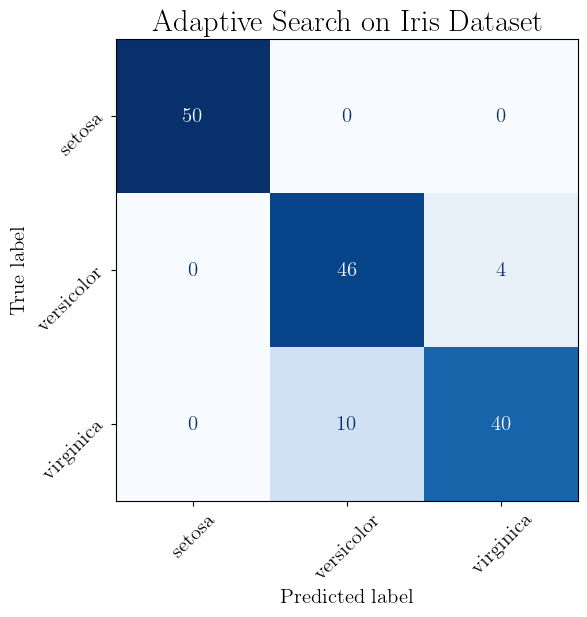

In [52]:
# Compute confusion matrix
cm = confusion_matrix(labels_true, labels_pred)
# Display confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
# plt.title('Confusion Matrix')
ax.set_title("Adaptive Search on Iris Dataset", fontsize=22)
ax.set_xticklabels(list(names), fontsize=15, rotation=45)
ax.set_yticklabels(list(names), fontsize=15, rotation=45)
plt.show()

In [70]:
from sklearn.datasets import load_breast_cancer, load_digits, load_wine

In [72]:
X, y = load_breast_cancer(return_X_y=True)
print(np.unique(y))

X, y = load_digits(return_X_y=True)
print(np.unique(y))

X, y = load_wine(return_X_y=True)
print(np.unique(y))

[0 1]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2]


In [170]:
save = False
plot = False 
methods = ['sampling_search']
dfs = {}
for data_name, loader in zip(data_names, loaders):
    print(data_name)
    if data_name == "digits":
        k = 15
    else:
        k = 10
    print("\t", f"k = {k}", 1+np.arange(k))
        
    X, y = loader(return_X_y=True)
    names = loader(as_frame=True).target_names 
    labels_true = names[y]
    k_to_show = len(names)

    cols = {}
    for p in [1,2,5, 'inf']:
        filename = f"results/{data_name}_cluster-dense_k{k}_p{p}_ns10.pkl"
        with open(filename, "rb") as f:
            data = pickle.load(f)
        
        for method in methods:
            dict = data[method]
            swaps = []
            for v in dict['energy_values']:
                swaps.append([len(x) for x in v])
            swaps = np.array(swaps)
            print("\t", p, method, swaps.mean(axis=0))
            print("\t\t", np.round(swaps.std(axis=0), 2))
        
        
            
            

iris
	 k = 10 [ 1  2  3  4  5  6  7  8  9 10]
	 1 sampling_search [ 2.   4.   6.   8.1 11.5 14.2 15.2 17.2 18.9 20.4]
		 [0.   0.   0.45 0.7  2.38 1.66 2.18 1.6  2.47 2.24]
	 2 sampling_search [ 2.   4.2  6.   8.6 11.2 12.2 14.6 18.2 19.8 20.6]
		 [0.   0.4  0.45 1.28 1.94 1.25 1.28 2.32 1.72 1.5 ]
	 5 sampling_search [ 2.   4.8  7.7  8.1 10.3 11.8 13.8 15.6 18.1 19.7]
		 [0.   0.4  1.1  0.94 1.35 1.25 1.33 1.74 2.7  1.62]
	 inf sampling_search [ 2.   3.4  6.8  9.6 11.2 12.7 13.2 12.3 14.7 16.5]
		 [0.   0.49 1.54 3.53 2.48 3.72 1.54 2.69 4.22 4.61]
wine
	 k = 10 [ 1  2  3  4  5  6  7  8  9 10]
	 1 sampling_search [ 2.   5.   8.3  9.4 10.7 13.4 14.9 16.6 18.2 20.3]
		 [0.   0.77 1.73 1.74 1.19 1.69 1.51 1.5  1.33 1.  ]
	 2 sampling_search [ 2.   5.3  8.3  8.6 11.8 14.1 17.6 16.6 20.  22. ]
		 [0.   0.9  1.55 1.5  2.48 2.74 3.14 1.02 1.84 2.72]
	 5 sampling_search [ 2.   4.6  9.6 12.1 12.9 14.1 17.  19.4 20.5 22.7]
		 [0.   0.92 3.01 3.7  3.56 1.97 3.   3.69 2.77 3.03]
	 inf sampling_se

In [175]:
methods = ['sampling_search']
data_names = ['salinas', 'paviasub', 'urbansub']
Ks = [6,9,6]
for data_name, k in zip(data_names, Ks):
    print(data_name)
    print("\t", f"k = {k}", 1+np.arange(k))
        
    X, y = loader(return_X_y=True)
    names = loader(as_frame=True).target_names 
    labels_true = names[y]
    k_to_show = len(names)

    cols = {}
    for p in [1,2,5, 'inf']:
        filename = f"results/{data_name}_conic_k{k}_p{p}_ns10.pkl"
        with open(filename, "rb") as f:
            data = pickle.load(f)
        
        for method in methods:
            dict = data[method]
            swaps = []
            for v in dict['energy_values']:
                swaps.append([len(x) for x in v])
            swaps = np.array(swaps)
            print("\t", p, method, swaps.mean(axis=0))
            print("\t\t", np.round(swaps.std(axis=0), 2))
        
        

salinas
	 k = 6 [1 2 3 4 5 6]
	 1 sampling_search [ 2.  4. 13. 21. 31. 43.]
		 [0. 0. 0. 0. 0. 0.]
	 2 sampling_search [ 2.  7.  8. 21. 10. 14.]
		 [0. 0. 0. 0. 0. 0.]
	 5 sampling_search [ 2.  4.  5. 21. 10. 12.]
		 [0. 0. 0. 0. 0. 0.]
	 inf sampling_search [ 2.  3.  4.  6. 17. 12.]
		 [0. 0. 0. 0. 0. 0.]
paviasub
	 k = 9 [1 2 3 4 5 6 7 8 9]
	 1 sampling_search [ 2.  6. 13. 15. 13. 14. 14. 16. 22.]
		 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
	 2 sampling_search [ 2.  4.  7. 13. 13. 19. 17. 19. 23.]
		 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
	 5 sampling_search [ 2.  6.  6. 12. 13. 15. 19. 23. 18.]
		 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
	 inf sampling_search [ 2.  4.  6.  7.  8.  8. 10. 26. 27.]
		 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
urbansub
	 k = 6 [1 2 3 4 5 6]


KeyError: 'sampling_search'

In [40]:
# Timing plots 
def plot_times(dirname, to_plot, numseeds, iter, save=False):
    filenames = np.array([os.path.join(dirname, fname) for fname in os.listdir(dirname) if len(fname.split("inf")) == 1])
    nvals = np.array([int(fname.split("_")[0].split("test")[-1]) for fname in filenames])
    sorted_indices = np.argsort(nvals)
    nvals = nvals[sorted_indices]
    filenames = filenames[sorted_indices]
    
    Times = {method:np.zeros((numseeds, len(nvals))) for method in to_plot}
    for i, filename in enumerate(filenames):
        with open(filename, "rb") as f:
            data = pickle.load(f)
            print(data.keys())
        for method, times_mat in Times.items():
            times_mat[:,i] = np.array(data[method]["times"])[:,iter]
            if method =="search":
                times_mat = times_mat[0,:].reshape(1,-1)
    
    fig, ax = plt.subplots(figsize=(9,6))
    for method, times_mat in Times.items():
        plot = ax.loglog(nvals, times_mat.mean(axis=0), color=colors[get_idx[method]], \
                            marker=markers[get_idx[method]], linestyle=linestyles[get_idx[method]], \
                            linewidth=2.0, label=names[get_idx[method]], markersize=8)

    ax.legend(loc='upper right', fontsize=18)
    ax.set_xlabel(r"Size $(n)$ of Dataset", fontsize=22)
    plt.tick_params(axis='x', labelsize=22)
    plt.tick_params(axis='y', labelsize=22)
    ax.set_ylabel(r"Time $(s)$ to Compute Build/Swap Move", fontsize=22)
    if not save:
        ax.set_title(f"{datasetname}, p = {filename.split('_p')[-1].split('_')[0]}", fontsize=22)
    else:
        plt.savefig(f"./figures/{filename.split('/')[-1].split('.pkl')[0]}.png", format="png", dpi=500, bbox_inches='tight')
    plt.show()

dict_keys(['search', 'sampling', 'uniform', 'search_search', 'sampling_search', 'sampling_sampling'])
search (10, 4) 8 0
sampling (10, 4) 8 0
dict_keys(['search', 'sampling', 'uniform', 'search_search', 'sampling_search', 'sampling_sampling'])
search (10, 4) 8 1
sampling (10, 4) 8 1
dict_keys(['search', 'sampling', 'uniform', 'search_search', 'sampling_search', 'sampling_sampling'])
search (10, 4) 8 2
sampling (10, 4) 8 2
dict_keys(['search', 'sampling', 'uniform', 'search_search', 'sampling_search', 'sampling_sampling'])
search (10, 4) 8 3
sampling (10, 4) 8 3


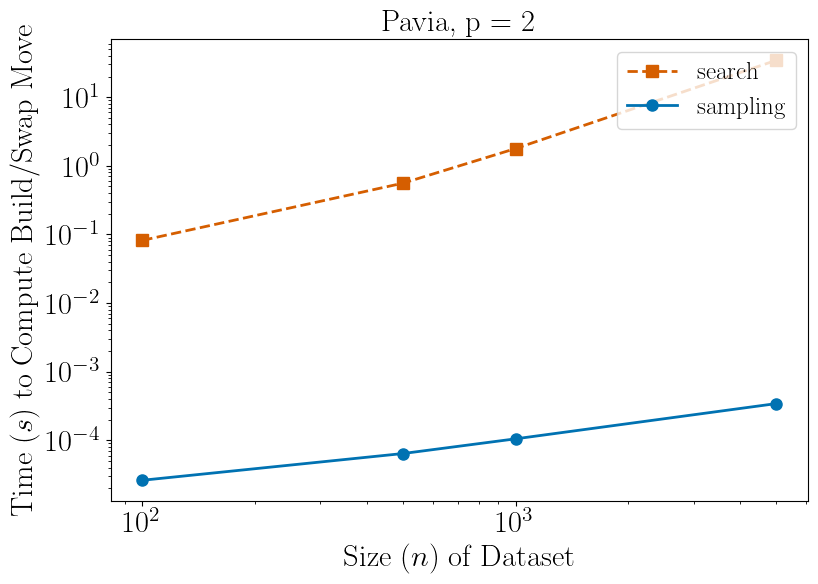

In [41]:
plot_times("timingresults", ["search", "sampling"], 10, 8)